<a href="https://colab.research.google.com/github/Juanisazalu/TRABAJO-2/blob/main/TRABAJO%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA, FactorAnalysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
#from kneed import KneeLocator
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FactorAnalysis
from scipy import stats

# Exploracion de datos

Lectura

In [4]:
tabla=pd.read_csv("CC GENERAL.csv")

Descripcion de las variables

En el conjunto de datos proporcionado, cada variable representa diferentes aspectos del comportamiento de los titulares de tarjetas de crédito. A continuación, te proporciono una interpretación de cada una de las variables:

CUST_ID (Identificación de Titular de Tarjeta de Crédito): Esta variable es una identificación única o código para cada titular de una tarjeta de crédito. Es una variable categórica que se utiliza para distinguir a los titulares de tarjetas de crédito en el conjunto de datos.

BALANCE (Saldo): Esta variable indica la cantidad de dinero que un titular de tarjeta de crédito tiene disponible en su cuenta para realizar compras. Es una medida del saldo actual en la cuenta del titular.

BALANCE_FREQUENCY (Frecuencia de Actualización de Saldo): Representa la frecuencia con la que el saldo de la cuenta se actualiza, con un puntaje que varía entre 0 y 1. Un puntaje de 1 significa que el saldo se actualiza con frecuencia, mientras que un puntaje de 0 indica que el saldo no se actualiza con frecuencia.

PURCHASES (Compras): Indica el monto total de las compras realizadas desde la cuenta de la tarjeta de crédito durante un período de tiempo.

ONEOFF_PURCHASES (Compras en un Solo Pago): Representa el monto máximo gastado en una sola compra.

INSTALLMENTS_PURCHASES (Compras en Cuotas): Indica la cantidad de compras realizadas en cuotas o a plazos.

CASH_ADVANCE (Avance de Efectivo): Muestra la cantidad de dinero en efectivo solicitada o retirada por el titular de la tarjeta de crédito.

PURCHASES_FREQUENCY (Frecuencia de Compras): Representa la frecuencia con la que se realizan compras, con un puntaje entre 0 y 1. Un puntaje de 1 indica que las compras se realizan con frecuencia.

ONEOFFPURCHASESFREQUENCY (Frecuencia de Compras en un Solo Pago): Indica con qué frecuencia se realizan compras en un solo pago.

PURCHASESINSTALLMENTSFREQUENCY (Frecuencia de Compras a Plazos): Muestra la frecuencia de las compras a plazos.

CASHADVANCEFREQUENCY (Frecuencia de Avances de Efectivo): Indica la frecuencia con la que se realizan avances de efectivo.

CASHADVANCETRX (Número de Transacciones de Avance de Efectivo): Representa el número de transacciones realizadas con avances de efectivo.

PURCHASES_TRX (Número de Transacciones de Compras): Indica el número de transacciones de compra realizadas.

CREDIT_LIMIT (Límite de Crédito): Representa el límite de crédito otorgado al titular de la tarjeta de crédito.

PAYMENTS (Pagos): Muestra la cantidad total de pagos realizados por el titular de la tarjeta de crédito.

MINIMUM_PAYMENTS (Pagos Mínimos): Indica la cantidad mínima de pagos que el titular de la tarjeta de crédito está obligado a realizar.

PRCFULLPAYMENT (Porcentaje de Pago Total): Representa el porcentaje del pago total realizado por el titular de la tarjeta de crédito.

TENURE (Duración de la Tenencia): Indica la duración o antigüedad del servicio de la tarjeta de crédito para el titular de la tarjeta.

Estas variables proporcionan información sobre el comportamiento financiero y el uso de la tarjeta de crédito por parte de los titulares, lo que puede ser útil para segmentar a los clientes y desarrollar estrategias de marketing dirigidas a grupos específicos.

Renombrar nombre de variables

In [5]:
tabla=tabla.rename(columns={"CUST_ID":"id","BALANCE":"saldo","BALANCE_FREQUENCY":"frecuenciaactsaldo","PURCHASES":"comprastotales","ONEOFF_PURCHASES":"montomaxcomprado","INSTALLMENTS_PURCHASES":"montoacuotas","CASH_ADVANCE":"anticipoefectivo","PURCHASES_FREQUENCY":"frecuenciacompras","ONEOFF_PURCHASES_FREQUENCY":"freccomprasunavez","PURCHASES_INSTALLMENTS_FREQUENCY":"freccomprasplazo","CASH_ADVANCE_FREQUENCY":"frecpagoantefectivo","CASH_ADVANCE_TRX":"ntranscashinadv","PURCHASES_TRX":"ntransacciones","CREDIT_LIMIT":"limtarjetacredito","PAYMENTS":"pagos","MINIMUM_PAYMENTS":"montominpagos","PRC_FULL_PAYMENT":"%totalpagado","TENURE":"antiguedad"})                                                                                            
tabla

id        saldo  frecuenciaactsaldo  comprastotales  \
0     C10001    40.900749            0.818182           95.40   
1     C10002  3202.467416            0.909091            0.00   
2     C10003  2495.148862            1.000000          773.17   
3     C10004  1666.670542            0.636364         1499.00   
4     C10005   817.714335            1.000000           16.00   
...      ...          ...                 ...             ...   
8945  C19186    28.493517            1.000000          291.12   
8946  C19187    19.183215            1.000000          300.00   
8947  C19188    23.398673            0.833333          144.40   
8948  C19189    13.457564            0.833333            0.00   
8949  C19190   372.708075            0.666667         1093.25   

      montomaxcomprado  montoacuotas  anticipoefectivo  frecuenciacompras  \
0                 0.00         95.40          0.000000           0.166667   
1                 0.00          0.00       6442.945483           0.000000   
2               773.17          0.00          0.000000           1.000000   
3              1499.00          0.00        205.788017           0.083333   
4                16.00          0.00          0.000000           0.083333   
...                ...           ...               ...                ...   
8945              0.00        291.12          0.000000           1.000000   
8946              0.00        300.00          0.000000           1.000000   
8947              0.00        144.40          0.000000           0.833333   
8948              0.00          0.00         36.558778           0.000000   
8949           1093.25          0.00        127.040008           0.666667   

      freccomprasunavez  freccomprasplazo  frecpagoantefectivo  \
0              0.000000          0.083333             0.000000   
1              0.000000          0.000000             0.250000   
2              1.000000          0.000000             0.000000   
3              0.083333          0.000000             0.083333   
4              0.083333          0.000000             0.000000   
...                 ...               ...                  ...   
8945           0.000000          0.833333             0.000000   
8946           0.000000          0.833333             0.000000   
8947           0.000000          0.666667             0.000000   
8948           0.000000          0.000000             0.166667   
8949           0.666667          0.000000             0.333333   

      ntranscashinadv  ntransacciones  limtarjetacredito        pagos  \
0                   0               2             1000.0   201.802084   
1                   4               0             7000.0  4103.032597   
2                   0              12             7500.0   622.066742   
3                   1               1             7500.0     0.000000   
4                   0               1             1200.0   678.334763   
...               ...             ...                ...          ...   
8945                0               6             1000.0   325.594462   
8946                0               6             1000.0   275.861322   
8947                0               5             1000.0    81.270775   
8948                2               0              500.0    52.549959   
8949                2              23             1200.0    63.165404   

      montominpagos  %totalpagado  antiguedad  
0        139.509787      0.000000          12  
1       1072.340217      0.222222          12  
2        627.284787      0.000000          12  
3               NaN      0.000000          12  
4        244.791237      0.000000          12  
...             ...           ...         ...  
8945      48.886365      0.500000           6  
8946            NaN      0.000000           6  
8947      82.418369      0.250000           6  
8948      55.755628      0.250000           6  
8949      88.288956      0.000000           6  

[8950 rows x 18 columns]

Informacion de la tabla


In [6]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   8950 non-null   object 
 1   saldo                8950 non-null   float64
 2   frecuenciaactsaldo   8950 non-null   float64
 3   comprastotales       8950 non-null   float64
 4   montomaxcomprado     8950 non-null   float64
 5   montoacuotas         8950 non-null   float64
 6   anticipoefectivo     8950 non-null   float64
 7   frecuenciacompras    8950 non-null   float64
 8   freccomprasunavez    8950 non-null   float64
 9   freccomprasplazo     8950 non-null   float64
 10  frecpagoantefectivo  8950 non-null   float64
 11  ntranscashinadv      8950 non-null   int64  
 12  ntransacciones       8950 non-null   int64  
 13  limtarjetacredito    8949 non-null   float64
 14  pagos                8950 non-null   float64
 15  montominpagos        8637 non-null   f

Se elimina la variable ID

In [7]:
tabla.drop("id",axis=1,inplace=True)

Tratamiento de nulos

In [8]:
tabla.isnull().sum()

saldo                    0
frecuenciaactsaldo       0
comprastotales           0
montomaxcomprado         0
montoacuotas             0
anticipoefectivo         0
frecuenciacompras        0
freccomprasunavez        0
freccomprasplazo         0
frecpagoantefectivo      0
ntranscashinadv          0
ntransacciones           0
limtarjetacredito        1
pagos                    0
montominpagos          313
%totalpagado             0
antiguedad               0
dtype: int64

Relleno de nulos

Buscamos la distribucion de la variable montominpagos para llenar adecuadamente los nulos

Text(0.5, 1.0, 'Límite targeta de credito (Boxplot)')

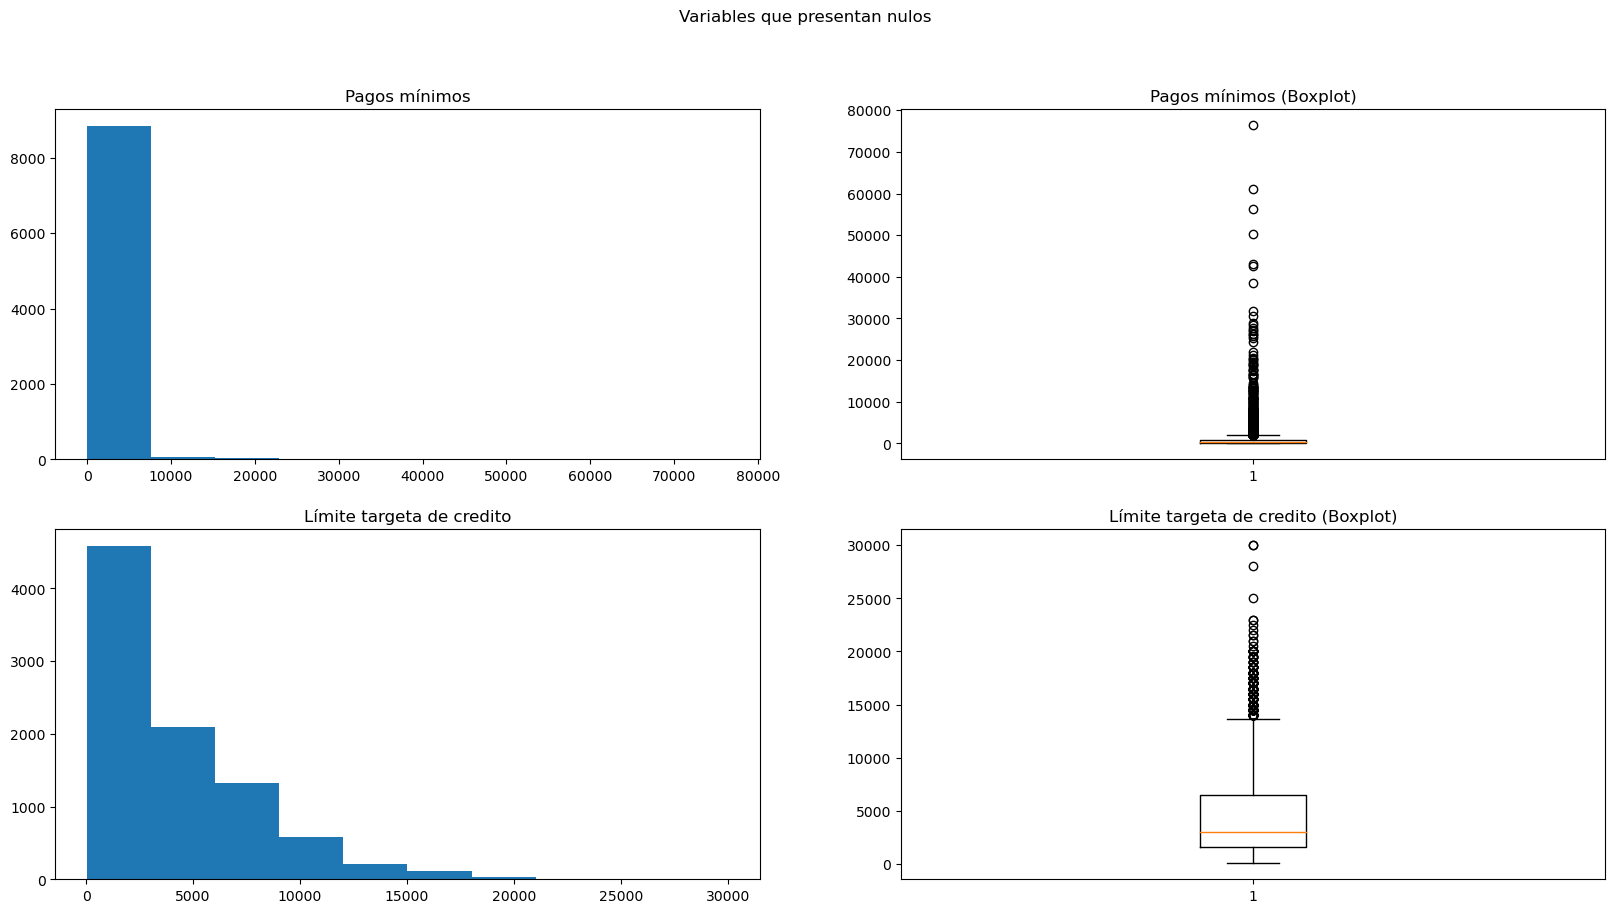

In [31]:
fig, ax= plt.subplots(figsize=(20,10), nrows=2, ncols=2)
fig.suptitle("Variables que presentan nulos")
ax[0,0].hist(tabla["montominpagos"])
ax[0,0].set_title('Pagos mínimos')
ax[0,1].boxplot(tabla["montominpagos"])
ax[0,1].set_title('Pagos mínimos (Boxplot)') 
ax[1,0].hist(tabla["limtarjetacredito"])
ax[1,0].set_title('Límite targeta de credito') 
ax[1,1].boxplot(tabla["limtarjetacredito"]) 
ax[1,1].set_title('Límite targeta de credito (Boxplot)')


Relleno de nulos con la media en ambas variables

Se procede a rellenar los nulos con la media, por lo que logramos observar en la distribución anterior hay mucha presencia de datos atípicos, para este problema es mejor la mediana porque no se afecta en gran medida por los atipicos, sin embargo se decidio llenar con la media ambas variables, ya que en pagos minimos era un solo nulo y en el limite de la tarjeta de credito se decidio por la distribucion tomar la media.

In [10]:
tabla.fillna(tabla.mean(),inplace=True)
tabla.isnull().sum()


saldo                  0
frecuenciaactsaldo     0
comprastotales         0
montomaxcomprado       0
montoacuotas           0
anticipoefectivo       0
frecuenciacompras      0
freccomprasunavez      0
freccomprasplazo       0
frecpagoantefectivo    0
ntranscashinadv        0
ntransacciones         0
limtarjetacredito      0
pagos                  0
montominpagos          0
%totalpagado           0
antiguedad             0
dtype: int64

Resumen estadistico para cada una de las varibles

In [32]:
tabla.describe()

saldo  frecuenciaactsaldo  comprastotales  montomaxcomprado  \
count   8950.000000         8950.000000     8950.000000       8950.000000   
mean    1564.474828            0.877271     1003.204834        592.437371   
std     2081.531879            0.236904     2136.634782       1659.887917   
min        0.000000            0.000000        0.000000          0.000000   
25%      128.281915            0.888889       39.635000          0.000000   
50%      873.385231            1.000000      361.280000         38.000000   
75%     2054.140036            1.000000     1110.130000        577.405000   
max    19043.138560            1.000000    49039.570000      40761.250000   

       montoacuotas  anticipoefectivo  frecuenciacompras  freccomprasunavez  \
count   8950.000000       8950.000000        8950.000000        8950.000000   
mean     411.067645        978.871112           0.490351           0.202458   
std      904.338115       2097.163877           0.401371           0.298336   
min        0.000000          0.000000           0.000000           0.000000   
25%        0.000000          0.000000           0.083333           0.000000   
50%       89.000000          0.000000           0.500000           0.083333   
75%      468.637500       1113.821139           0.916667           0.300000   
max    22500.000000      47137.211760           1.000000           1.000000   

       freccomprasplazo  frecpagoantefectivo  ntranscashinadv  ntransacciones  \
count       8950.000000          8950.000000      8950.000000     8950.000000   
mean           0.364437             0.135144         3.248827       14.709832   
std            0.397448             0.200121         6.824647       24.857649   
min            0.000000             0.000000         0.000000        0.000000   
25%            0.000000             0.000000         0.000000        1.000000   
50%            0.166667             0.000000         0.000000        7.000000   
75%            0.750000             0.222222         4.000000       17.000000   
max            1.000000             1.500000       123.000000      358.000000   

       limtarjetacredito         pagos  montominpagos  %totalpagado  \
count        8950.000000   8950.000000    8950.000000   8950.000000   
mean         4494.449450   1733.143852     864.206542      0.153715   
std          3638.612411   2895.063757    2330.588021      0.292499   
min            50.000000      0.000000       0.019163      0.000000   
25%          1600.000000    383.276166     170.857654      0.000000   
50%          3000.000000    856.901546     335.628312      0.000000   
75%          6500.000000   1901.134317     864.206542      0.142857   
max         30000.000000  50721.483360   76406.207520      1.000000   

        antiguedad  
count  8950.000000  
mean     11.517318  
std       1.338331  
min       6.000000  
25%      12.000000  
50%      12.000000  
75%      12.000000  
max      12.000000

Prueba de normalidad

Como se observa en el siguiente codigo, la variables siguen una distribucion normal, por lo tanto se realizar el el algoritmo de mezclas gauseanas

In [11]:
import pandas as pd
from scipy import stats
import random
columnas = []
valores = []
tamaño_muestra = 100
for feature_name in tabla.columns:
    columnas.append(feature_name)
    muestra = random.sample(tabla[feature_name].tolist(), tamaño_muestra)
    shapiro_test = stats.shapiro(muestra)
    valores.append(shapiro_test[1])
resumenprueba = pd.DataFrame({"Variables": columnas, "P_value": valores})
alpha=0.05
resumenprueba["normalidad"]=resumenprueba["P_value"].apply(lambda x: "distribucion normal" if x <alpha else "otra distribucion")
resumenprueba

Variables       P_value           normalidad
0                 saldo  2.197964e-13  distribucion normal
1    frecuenciaactsaldo  4.137489e-15  distribucion normal
2        comprastotales  1.604554e-17  distribucion normal
3      montomaxcomprado  7.071882e-16  distribucion normal
4          montoacuotas  1.526639e-16  distribucion normal
5      anticipoefectivo  1.302476e-15  distribucion normal
6     frecuenciacompras  2.868241e-09  distribucion normal
7     freccomprasunavez  2.549146e-12  distribucion normal
8      freccomprasplazo  7.281521e-11  distribucion normal
9   frecpagoantefectivo  3.131624e-13  distribucion normal
10      ntranscashinadv  4.588120e-20  distribucion normal
11       ntransacciones  5.579538e-17  distribucion normal
12    limtarjetacredito  2.648868e-08  distribucion normal
13                pagos  3.258090e-14  distribucion normal
14        montominpagos  7.936281e-15  distribucion normal
15         %totalpagado  2.062687e-15  distribucion normal
16           antiguedad  3.176023e-17  distribucion normal

Correlacion de variables

<Axes: >

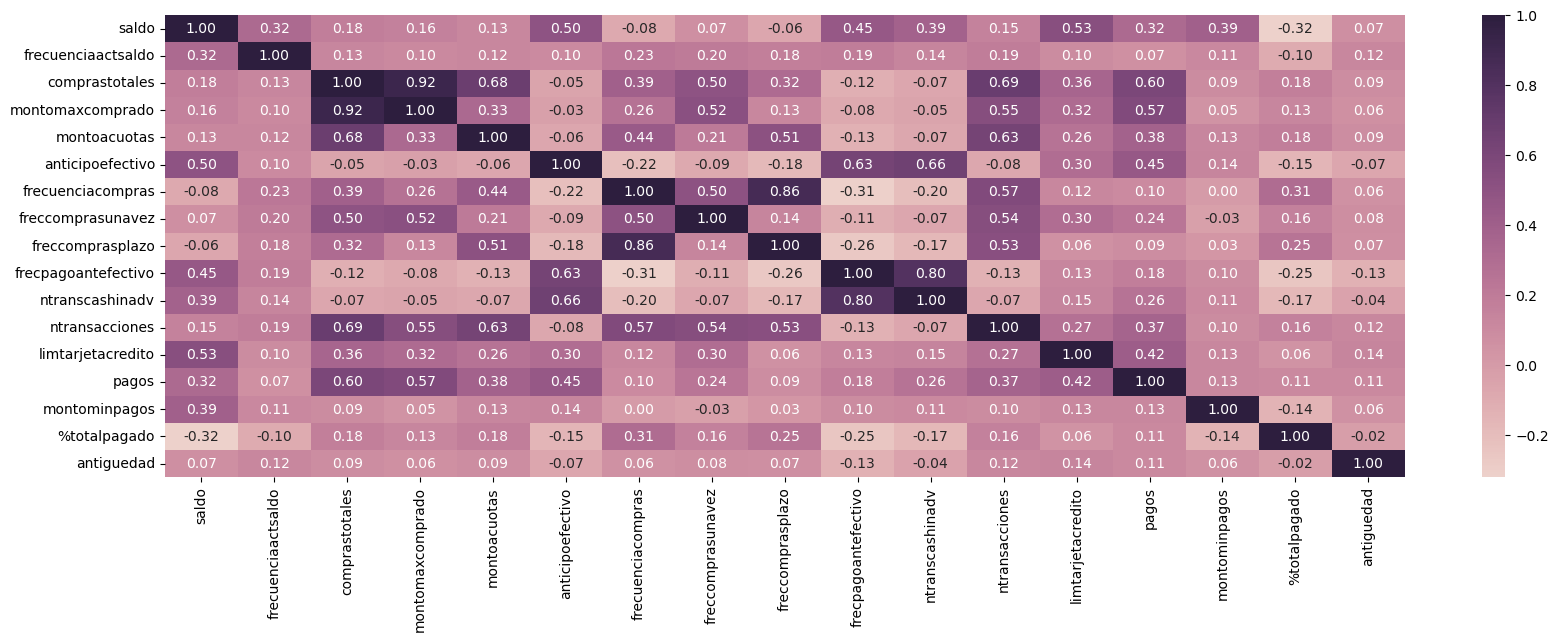

In [12]:
figure(figsize=(20,6))
sns.heatmap(tabla.corr(),cmap = sns.cubehelix_palette(as_cmap=True), annot = True, fmt = ".2f")

Inicialmente se decidio eliminar la variable compras totales, frecuencia de compras a plazo,frecuencia pago en efectivo porque eran variables que presentaban correlación con otras variables, sin embargo luego de ver los resultados las metricas disminuyeron drasticamente, por lo tanto se considero dejar todas las variables

Grafico histograma de cada variable

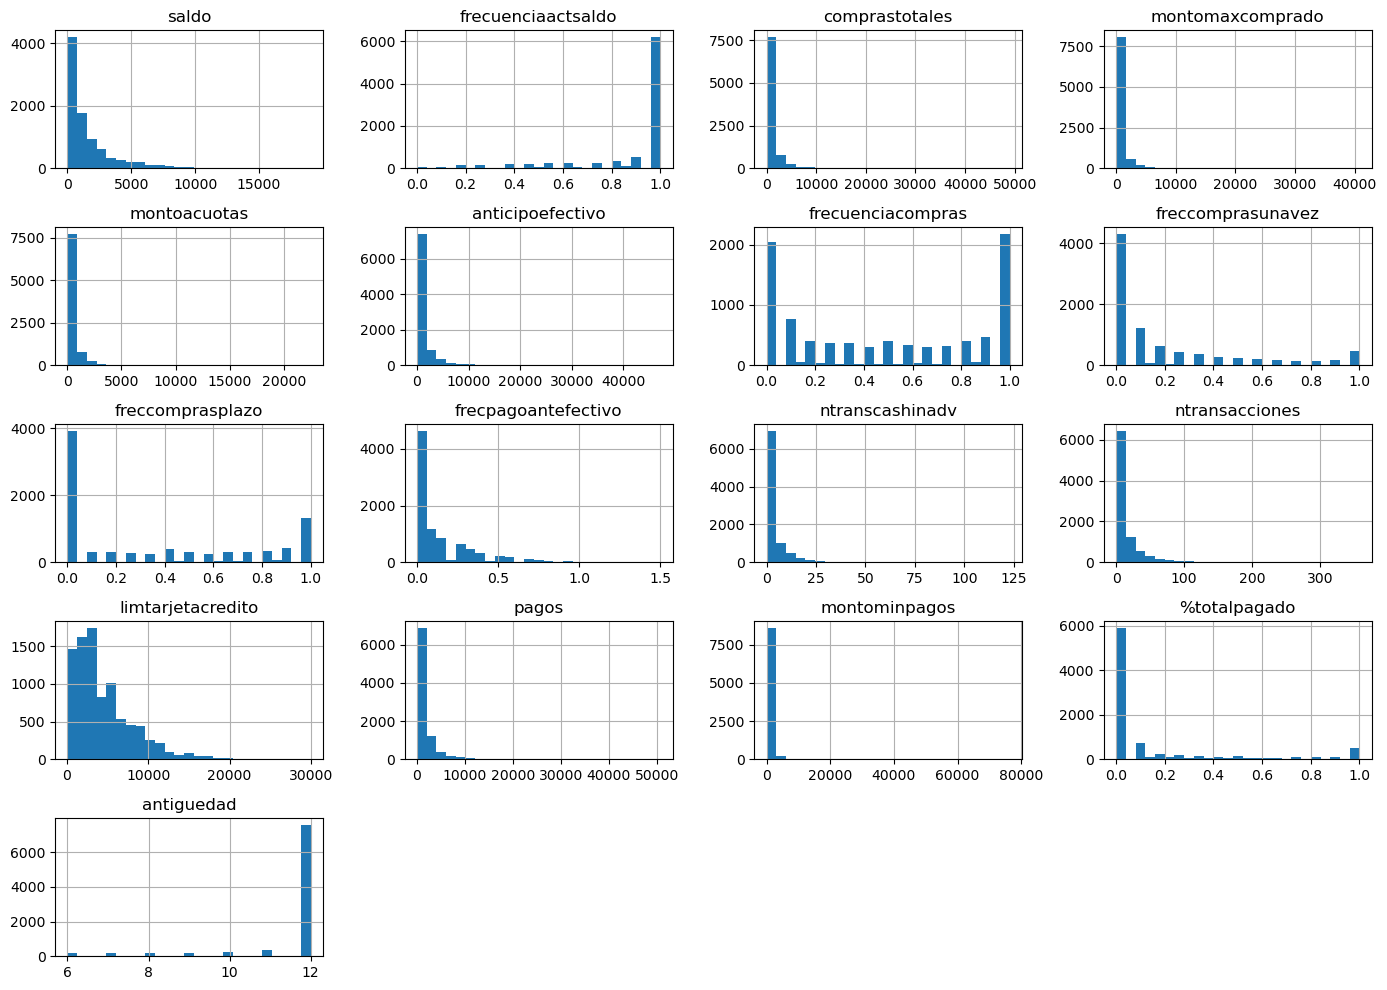

In [13]:
tabla.hist(figsize=(14,10), bins=25)
plt.tight_layout()
plt.show()

La mayoria de las varibles a simple vista tienen una distribucion normal con asimetria positiva, con la prueba realizada anteriormente se confirmo esta hipotesis

# Preprocesamiento

Escalado de variables

In [14]:
scaler = StandardScaler()
scaled_tabla=pd.DataFrame(scaler.fit_transform(tabla),columns=tabla.columns)
scaled_tabla


saldo  frecuenciaactsaldo  comprastotales  montomaxcomprado  \
0    -0.731989           -0.249434       -0.424900         -0.356934   
1     0.786961            0.134325       -0.469552         -0.356934   
2     0.447135            0.518084       -0.107668          0.108889   
3     0.049099           -1.016953        0.232058          0.546189   
4    -0.358775            0.518084       -0.462063         -0.347294   
...        ...                 ...             ...               ...   
8945 -0.737950            0.518084       -0.333293         -0.356934   
8946 -0.742423            0.518084       -0.329136         -0.356934   
8947 -0.740398           -0.185477       -0.401965         -0.356934   
8948 -0.745174           -0.185477       -0.469552         -0.356934   
8949 -0.572575           -0.889033        0.042146          0.301732   

      montoacuotas  anticipoefectivo  frecuenciacompras  freccomprasunavez  \
0        -0.349079         -0.466786          -0.806490          -0.678661   
1        -0.454576          2.605605          -1.221758          -0.678661   
2        -0.454576         -0.466786           1.269843           2.673451   
3        -0.454576         -0.368653          -1.014125          -0.399319   
4        -0.454576         -0.466786          -1.014125          -0.399319   
...            ...               ...                ...                ...   
8945     -0.132643         -0.466786           1.269843          -0.678661   
8946     -0.122823         -0.466786           1.269843          -0.678661   
8947     -0.294893         -0.466786           0.854576          -0.678661   
8948     -0.454576         -0.449352          -1.221758          -0.678661   
8949     -0.454576         -0.406205           0.439310           1.556082   

      freccomprasplazo  frecpagoantefectivo  ntranscashinadv  ntransacciones  \
0            -0.707313            -0.675349        -0.476070       -0.511333   
1            -0.916995             0.573963         0.110074       -0.591796   
2            -0.916995            -0.675349        -0.476070       -0.109020   
3            -0.916995            -0.258913        -0.329534       -0.551565   
4            -0.916995            -0.675349        -0.476070       -0.551565   
...                ...                  ...              ...             ...   
8945          1.179833            -0.675349        -0.476070       -0.350408   
8946          1.179833            -0.675349        -0.476070       -0.350408   
8947          0.760469            -0.675349        -0.476070       -0.390639   
8948         -0.916995             0.157527        -0.182998       -0.591796   
8949         -0.916995             0.990398        -0.182998        0.333524   

      limtarjetacredito     pagos  montominpagos  %totalpagado  antiguedad  
0             -0.960433 -0.528979  -3.109675e-01     -0.525551    0.360680  
1              0.688639  0.818642   8.931021e-02      0.234227    0.360680  
2              0.826062 -0.383805  -1.016632e-01     -0.525551    0.360680  
3              0.826062 -0.598688   4.878305e-17     -0.525551    0.360680  
4             -0.905464 -0.364368  -2.657913e-01     -0.525551    0.360680  
...                 ...       ...            ...           ...         ...  
8945          -0.960433 -0.486217  -3.498541e-01      1.183951   -4.122768  
8946          -0.960433 -0.503396   4.878305e-17     -0.525551   -4.122768  
8947          -0.960433 -0.570615  -3.354655e-01      0.329200   -4.122768  
8948          -1.097856 -0.580536  -3.469065e-01      0.329200   -4.122768  
8949          -0.905464 -0.576869  -3.329464e-01     -0.525551   -4.122768  

[8950 rows x 17 columns]

 Tratamiendo de valares atipicos

Boxplot de las variables

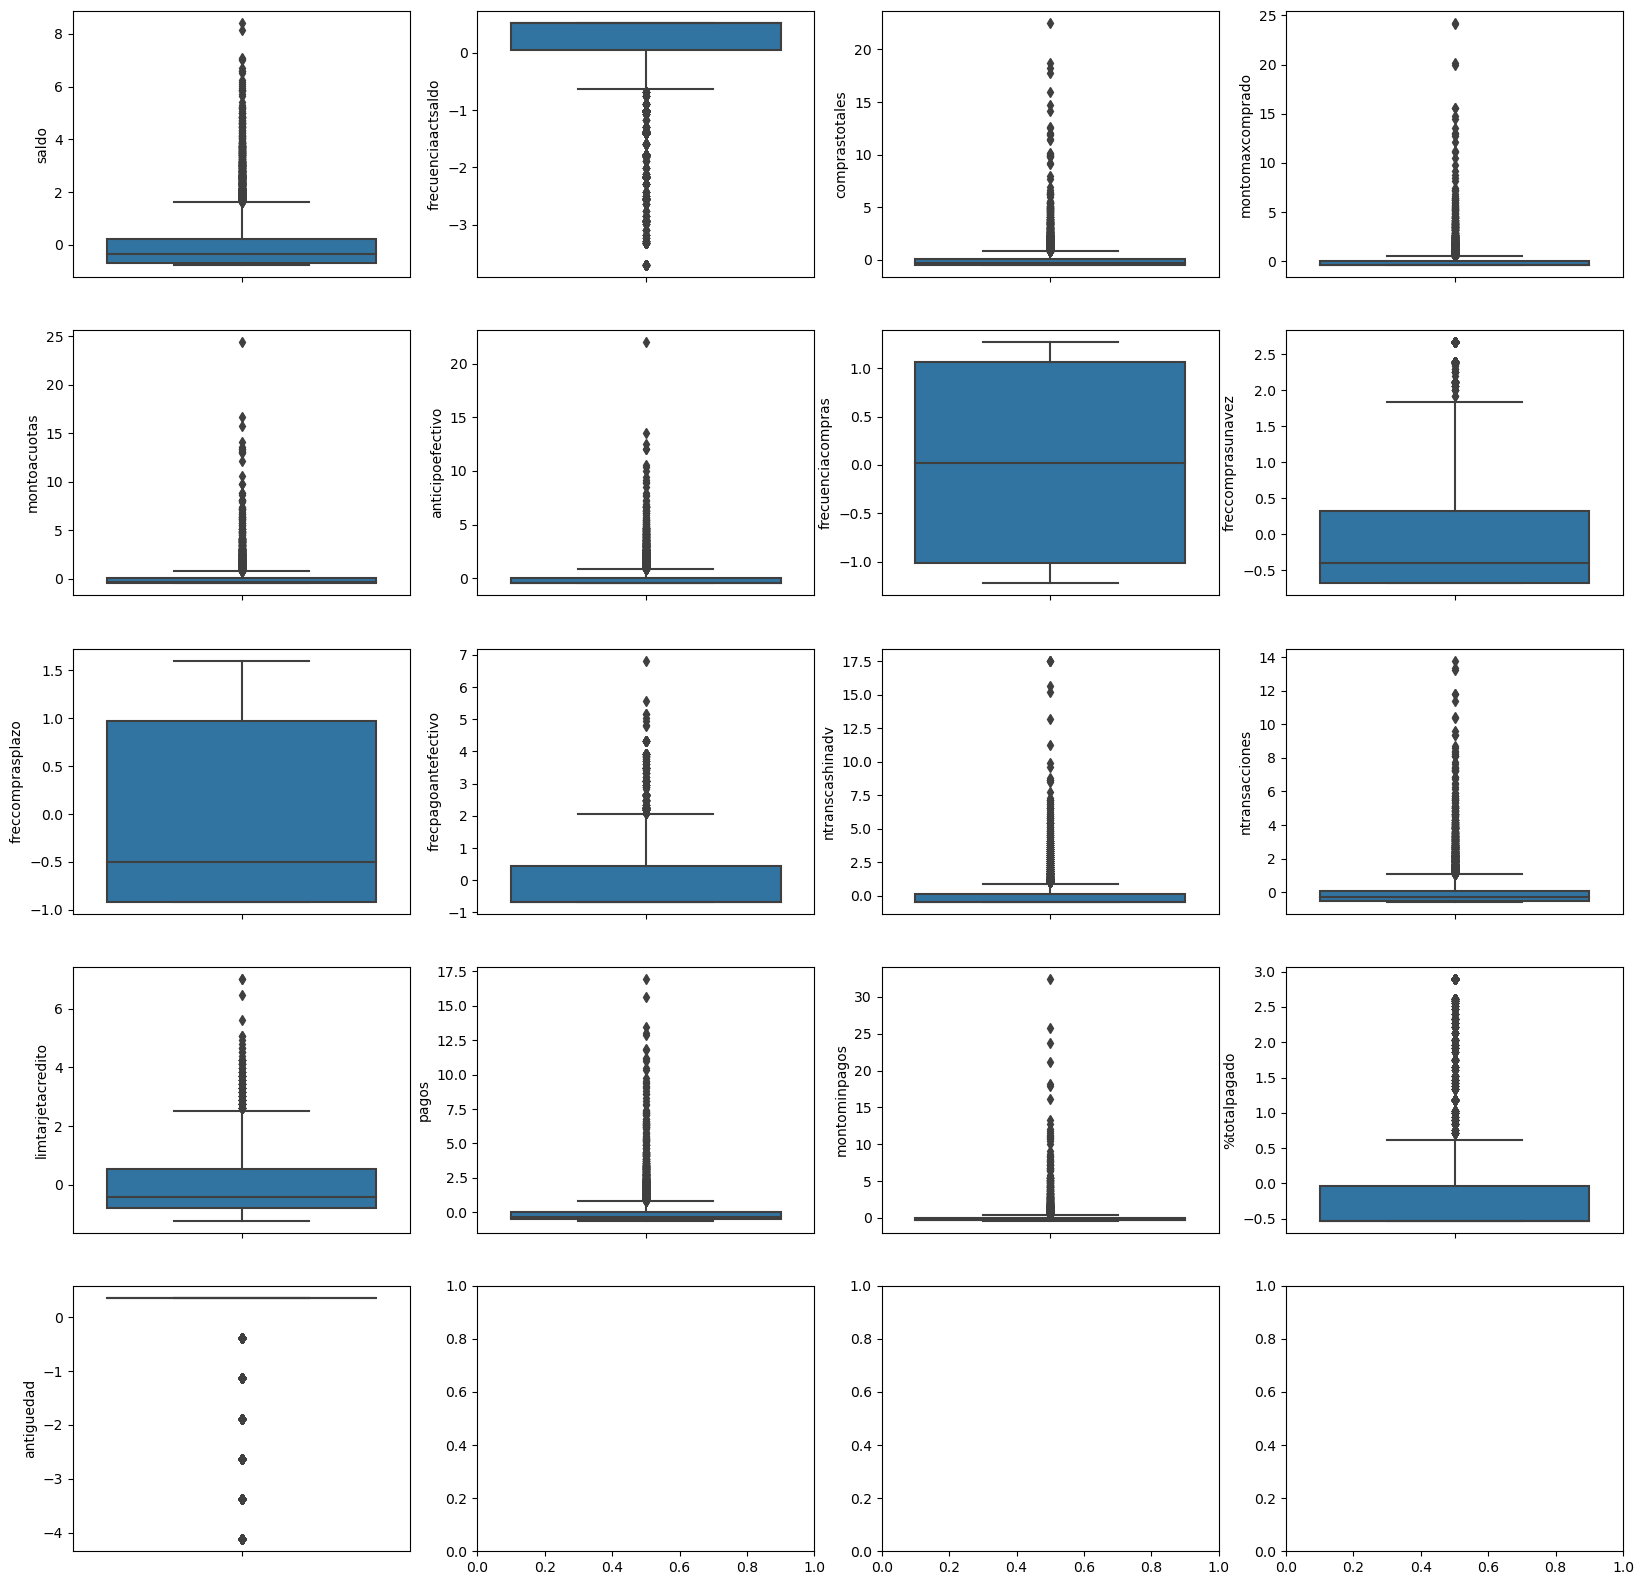

In [15]:
# Tratamiento de valores atípicos
train_tabla = scaled_tabla.copy()

# Sentar las bases de un "mosaico boxplot de 6x4 (para cubrir 22 variables)":
box_locs=pd.DataFrame(
{"vert":sorted(list(range(0,6))*4),
 "horiz":list(range(0,4))*6}
)

fig,axs=plt.subplots(ncols=4,nrows=5,figsize=(20,20))

for idx,i in enumerate(train_tabla.columns):
    sns.boxplot(y=train_tabla[i],ax=axs[box_locs.iloc[idx,0]][box_locs.iloc[idx,1]])

La mayoria de varibles presentan datos atipicos, se realizara la imputacion a continuación

Imputacion de valores atipicos

In [16]:
# Definición de función que utiliza RIC para la detección de valores atípicos
def outlier_IQR(df, column, thr): #thr es para eliiminar los valores que esten por fuera del 1.5 veces el rango intercuartilico
    Q1 = np.quantile(df[column], 0.25) # first quartile
    Q3 = np.quantile(df[column], 0.75) # third quartile
    IQR = Q3 - Q1 # inter - quartile range
    threshold = thr * IQR # defining the threshold
    lower = Q1 - threshold
    upper = Q3 + threshold
    lower_bound = df[df[column] < lower]
    upper_bound = df[df[column] > upper]
    return upper, lower

Encontramos los limites


In [17]:

listupper = []
listlower = []
i=0

listar=[3.5,7.0,4.5,4.5,3.5,5.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,7.0,3.5]
for feature_name in train_tabla.columns:
    upper, lower = outlier_IQR(train_tabla, feature_name, thr=listar[i] )
    listupper.append(upper)
    listlower.append(lower)
    i+=1
limites = pd.DataFrame({'Upper_Limit': listupper, 'Lower_Limit': listlower})
limites

# Ahora tienes un DataFrame 'limites' con los límites superior e inferior para cada columna en train_tabla

Upper_Limit  Lower_Limit
0      3.473679    -3.928430
1      3.801357    -3.234228
2      2.304759    -2.705713
3      1.556391    -1.922382
4      1.877501    -2.268414
5      2.985611    -3.388044
6      8.329387    -8.281302
7      3.846690    -4.198378
8      7.575161    -7.522005
9      4.321892    -4.562092
10     2.161577    -2.527573
11     2.345090    -2.804518
12     5.264815    -5.509125
13     1.893154    -2.301415
14     1.041307    -1.338823
15     3.381878    -3.944551
16     0.360680     0.360680

Modificamos los valores a eliminar de la varibles antiguedad porque eliminaba muchos datos, esto sucedida porque tenia muy poquitos datos atípicos ubicados muy lejos de la mediana

In [18]:
limites.iat[16,0]=10
limites.iat[16,1]=-10

Limites actuales

In [19]:
limites

Upper_Limit  Lower_Limit
0      3.473679    -3.928430
1      3.801357    -3.234228
2      2.304759    -2.705713
3      1.556391    -1.922382
4      1.877501    -2.268414
5      2.985611    -3.388044
6      8.329387    -8.281302
7      3.846690    -4.198378
8      7.575161    -7.522005
9      4.321892    -4.562092
10     2.161577    -2.527573
11     2.345090    -2.804518
12     5.264815    -5.509125
13     1.893154    -2.301415
14     1.041307    -1.338823
15     3.381878    -3.944551
16    10.000000   -10.000000

Se filtra la tabla sin atipicos

In [20]:
train=train_tabla
tamañoantes = []
tamañodespues = []
i = 0
for feature_name, feature_array in train.items():
    tamañoantes.append(train.shape[0])
    train = train[(train[feature_name] <= limites['Upper_Limit'][i]) & (train[feature_name] >= limites['Lower_Limit'][i])]
    tamañodespues.append(train.shape[0])
    i += 1
valoreseliminados = pd.DataFrame({'tamaño_inicial': tamañoantes, 'tamaño_final': tamañodespues})
valoreseliminados
valoreseliminados.set_index(train.columns,inplace=True)
valoreseliminados["valoreseliminados"]=valoreseliminados["tamaño_inicial"]-valoreseliminados["tamaño_final"]
display(valoreseliminados)
display("filas totales eliminadas", valoreseliminados["valoreseliminados"].sum())


tamaño_inicial  tamaño_final  valoreseliminados
saldo                          8950          8826                124
frecuenciaactsaldo             8826          8666                160
comprastotales                 8666          8485                181
montomaxcomprado               8485          8316                169
montoacuotas                   8316          8124                192
anticipoefectivo               8124          7977                147
frecuenciacompras              7977          7977                  0
freccomprasunavez              7977          7977                  0
freccomprasplazo               7977          7977                  0
frecpagoantefectivo            7977          7956                 21
ntranscashinadv                7956          7757                199
ntransacciones                 7757          7676                 81
limtarjetacredito              7676          7675                  1
pagos                          7675          7581                 94
montominpagos                  7581          7399                182
%totalpagado                   7399          7399                  0
antiguedad                     7399          7399                  0

'filas totales eliminadas'

1551

Explicación de variable por varible del procedimiento con atípicos (recordemos que el treshold  es el  rango intercuartilico * n de veces)

Saldo: Variable que presentó un alto número de atípicos, esto se puede deber a que la cantidad de dinero que presentan los titulares puede ser muy alta en personas con alto nivel adquisitivo. Según la distribución que se observa en el Boxplot, se escoge un treshold de 3.5, en donde se elimina 124.

Frecuenciaactsaldo: esta variable también presentaba un comportamiento similar al de la variable “saldo”, puesto que cada titular se puede suponer que actualiza con más frecuencia su saldo a medida que más movimiento de dinero haga.  Se encontró también una alta cantidad de atípicos, eliminando 160 en total, dando un treshold de 7.

Comprastotales: esta fue una de las variables con más atípicos presentados, puesto que al igual que las variables anteriores se van a ver influenciadas por ciertos titulares que al tener una alta capacidad adquisitiva, van a realizar más compras que la mayoría. Se eliminaron 181 datos en total con un treshold de 4.5.

Montomaxcomprado: la variable al describir el monto máximo que se ha realizado en una sola compra, también se va a ver influenciada normalmente por titulares que debido a una gran capacidad adquisitiva puede pagar en un solo monto mucho más que la mayoría. Se eliminan 169 datos en total, con un treshold de 4.5. 

Montoacuotas: Variable que presenta un alto número de atípicos, acá los titulares también se van a ver influenciados por su capacidad adquisitiva	 al igual que en las variables anteriores, pero incluso puede que una persona con mayores ingresos realice menos compras a cuotas. Se eliminan en total 192 datos, considerando un treshold de 3.5.

Anticipoefectivo: la variable muestra que existen muchos titulares que solicitan un anticipo de dinero en efectivo, según el boxplot, puede que la mayoría de los titulares no realice muchos adelantos, pero algunos si realizan bastantes, por lo que se evidencia gran número de atípicos. Se eliminan 147, colocando un treshold de 5.5.

Frecuenciacompras: No presenta datos atípicos, por lo que se puede suponer que no es un factor diferenciador para la frecuencia de compra el determinante de las variables anteriores que son la capacidad adquisitiva, tanto titulares con una alta o baja capacidad tiene frecuencias dentro del rango establecido como normal.

Freccomprasunavez: Esta variable indica la cantidad de compras que se pagan en una sola cuotaAl tener un comportamiento similar que el de la variable anterior, también se puede observar que no hay datos atípicos.

Freccomprasplazo: Tampoco presenta datos atípicos, al igual que las dos variables anteriores, la frecuencia de compra en un plazo determinado no se ve influenciada por datos atípicos, puesto que puede que sea indiferente la capacidad económica del titular.

Frecpagoantefectivo: Se observa presencia de datos atípicos, la frecuencia de avances en efectivo puede verse influenciada por datos atípicos, ya que pocas personas deciden tener este tipo de avances por lo que son sumamente costosos por su tasa alta de interes. Se eliminan 21 datos en total con un treshold de 3.5.

Ntranscashinadv: La mayoría de los titulares no realiza avances, sin embargo, a pesar del alto coste que puede significar un avance en efectivo, se presenta un alto número de titulares que los realizan, dando un alto número de datos atípicos. 199 se eliminaron en total, con un treshold de 3.5.

Ntransacciones: El número de transacciones que realizan los titulares presentan al igual que muchas de las variables anteriormente vistas un gran número de atípicos, por lo que está altamente relacionado con la capacidad adquisitiva que los titulares de las tarjetas pueden llegar a tener, aunque no tan altamente relacionado como por ejemplo la variable saldo. Se eliminan 81 datos en total, teniendo en cuenta un treshold de 3.5.

Limtarjetacredito: aunque esta variable bien se puede ver influenciada por la vida crediticia de los titulares y a su vez por sus ingresos, sus datos atípicos no están tan alejados de la mediana de los datos como otro tipo de variable, por lo que con un tresholde de varianza de un 3.5, solo se eliminó un dato.	1

Pagos: Aquí si se logra evidenciar que muchos datos atípicos se encuentran muy alejados de la mayoría del resto de los datos, los pagos que ejercen muchos titulares bien se pueden ver afectado por el ingreso del titular, generando así un sesgo hacia la derecha como la gran mayoría de las variables analizadas. Se eliminaron 94 datos en total. 

Montominpagos: en este variable se analiza la cantidad más pequeña de dinero que tiene que pagar cada mes el titular de la cuenta para mantener su cuenta al día, la naturaleza de la variable también nos indica que hay un gran número de atípicos y que muchos de esos datos están muy alejados de la mediana. Se eliminan 182 datos en total con un treshold de 3.5.

%totalpagado: esta variable tiene una cantidad de datos atípicos que se alejan mucho de la mediana, dicho porcentaje tiene un sesgo a la derecha bastante fuerte, por lo que se decide por un treshold de 7 para evitar que se pierdan muchos datos en la eliminación. Siendo así, no se elimina ningún dato con esta medida.

Antigüedad: La variable relacionada con la antigüedad de los titulares que se analizaron en esta base de datos, a pesar de que presenta valores atípicos, estos se alejan mucho de la mediana, estando la mayoría de los datos rondando los 12 años de tenencia, por lo que con un treshold de 3.5, no se elimina ningún dato.


Tamaño nuevo de la tabla

In [21]:
train.shape

(7399, 17)

Boxplot sin atipicos

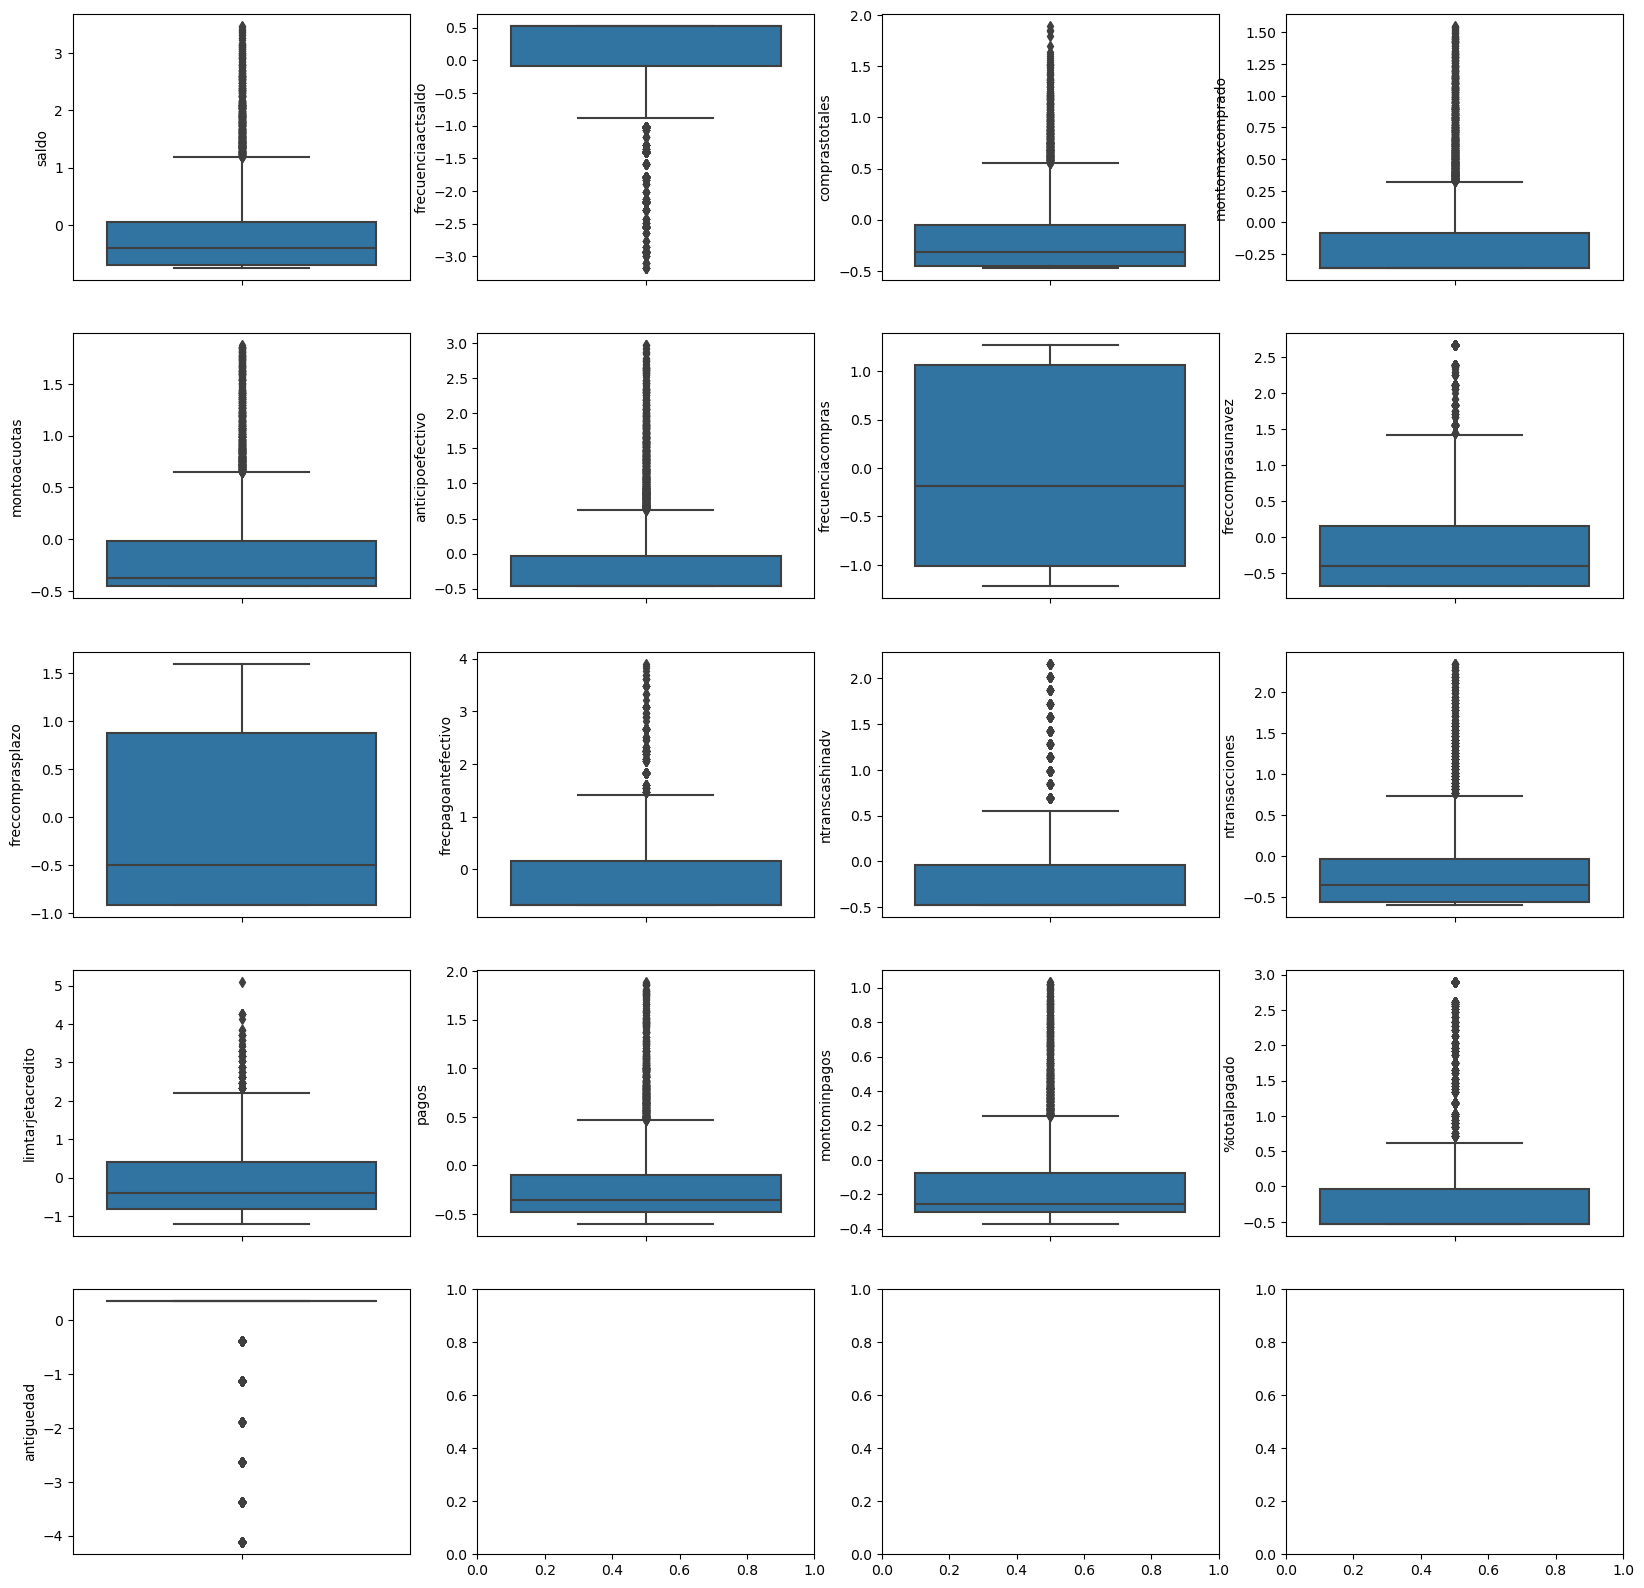

In [22]:
# Sentar las bases de un "mosaico boxplot de 6x4 (para cubrir 22 variables)":
box_locs=pd.DataFrame(
{"vert":sorted(list(range(0,6))*4),
 "horiz":list(range(0,4))*6}
)

fig,axs=plt.subplots(ncols=4,nrows=5,figsize=(20,20))

for idx,i in enumerate(train.columns):
    sns.boxplot(y=train[i],ax=axs[box_locs.iloc[idx,0]][box_locs.iloc[idx,1]])

Como se puede observar los criterios de eliminacion de atipicos que se usaron para cada variable mejoraron las distribuciones.

# Modelo base k-means

Grafico de inercia

In [23]:
# Número optimo de K
inertia_list = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init= 'k-means++' , random_state=3)
    kmeans.fit(train)
    inertia_list.append(kmeans.inertia_)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\clust

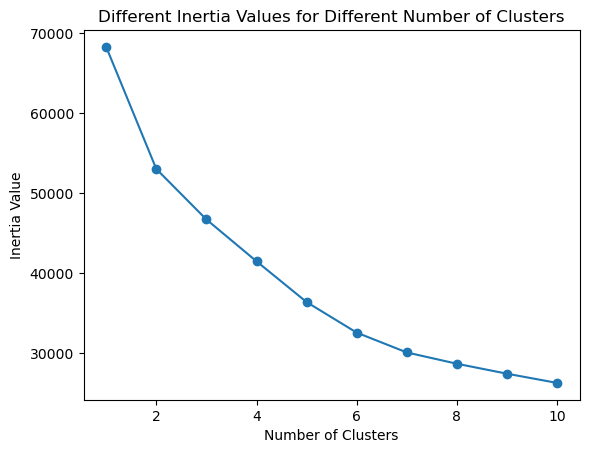

In [24]:
# plot the inertia curve
plt.plot(range(1,11),inertia_list)
plt.scatter(range(1,11),inertia_list)
plt.xlabel("Number of Clusters", size=10)
plt.ylabel("Inertia Value", size=10)
plt.title("Different Inertia Values for Different Number of Clusters", size=12)
plt.show()

El cluster puede estar en 6, sin embargo se analizan otros graficos

 Metodo del codo

In [25]:
# Argumentos del algoritmo kmeans
kmeans_kwargs = {"init": 'random', "n_init": 10, "max_iter": 300, "random_state": 42}
# Lista que almacena los valores de SSE para cada valor K, metricas de evaluacion
sse = []
# Ciclo para entrenar algoritmos de kmeans con cada valor de k
for k in range(1, 15):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(train)
  sse.append(kmeans.inertia_)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


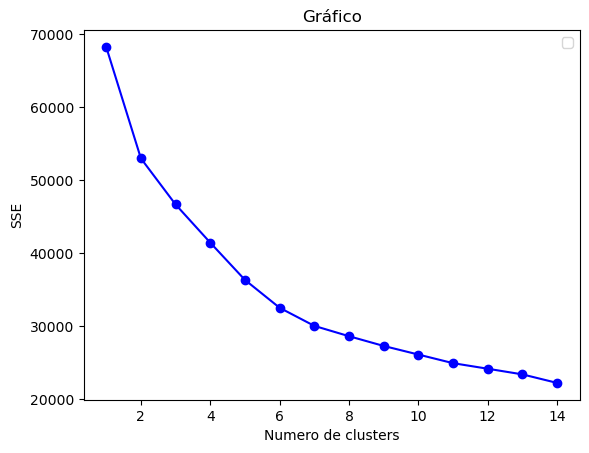

In [26]:
fig, ax = plt.subplots()
ax.plot(np.arange(1,15), sse, color='blue', marker='o')

# Personalizar el gráfico
ax.set_title('Gráfico')
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('SSE')
ax.legend()

# Mostrar el gráfico
plt.show()

La grafica demuestra 6 clusters

 Grafico de silueta

In [27]:
# Lista contiene los coeficientes de silueta para cada k
silhouette_coefficients = []
# Fíjate que empiezas con 2 grupos para el coeficiente de silueta
for k in range(2, 15):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(train)
  score = silhouette_score(train, kmeans.labels_)
  silhouette_coefficients.append(score)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


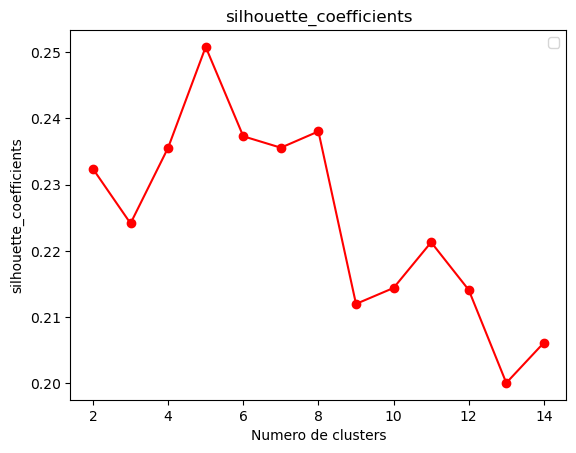

In [28]:
fig, ax = plt.subplots()
ax.plot(np.arange(2,15), silhouette_coefficients, color='red', marker='o')

# Personalizar el gráfico
ax.set_title('silhouette_coefficients')
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('silhouette_coefficients')
ax.legend()

# Mostrar el gráfico
plt.show()

El mejor valor para los cluster es 5

In [29]:
# Seleccion automatica del numero k
kl = KneeLocator(range(1, 15),
                 sse, curve="convex",
                 direction="decreasing")

kl.elbow

NameError: name 'KneeLocator' is not defined

Valor recomendado por Kneelocator, se tomara este valor para el modelo

Modelo

In [ ]:
#Modelo kmeans
kmeans = KMeans(init="random",
                n_clusters=6,
                n_init=10,
                max_iter=100,
                random_state=42)
# Ajuste de algoritmo a caracteristicas escaladas
kmeans.fit(train)
# Coordenadas de los centroides
print(kmeans.cluster_centers_)
# Numero de interaciones necesarias para converger
print("Numero de iteraciones: ",kmeans.n_iter_)
# metricas
print('Inertia: ', kmeans.inertia_)
print('Silhouette Score: ', silhouette_score(train, kmeans.labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(train, kmeans.labels_))

[[-3.84120237e-01 -3.75636335e-01 -2.97092688e-01 -2.30212375e-01
  -2.79148234e-01 -9.98169067e-04 -1.78397927e-01 -2.89354729e-01
  -1.99952779e-01  2.37339983e-01 -4.96031885e-02 -3.85874180e-01
  -5.95593776e-01 -4.16936964e-01 -2.28245361e-01  3.69965009e-02
  -3.21748045e+00]
 [-1.32064402e-01  4.10744890e-01  3.57754982e-01  4.34451058e-01
   4.74949332e-02 -3.34154977e-01  9.82569732e-01  1.86082559e+00
   2.09761519e-01 -4.08095228e-01 -3.33204640e-01  5.37260861e-01
   3.88680009e-01  1.11551978e-02 -1.62732367e-01  3.40167865e-01
   2.75323337e-01]
 [-6.97260612e-01 -1.90998904e+00 -3.06876585e-01 -2.30222078e-01
  -3.02501974e-01 -3.32934255e-01 -5.67560303e-01 -4.15118965e-01
  -4.76103749e-01 -5.23670970e-01 -3.81425895e-01 -4.17271306e-01
  -1.79753675e-01 -2.82872296e-01 -2.90271337e-01  4.00370240e-01
   2.25364239e-01]
 [ 9.70558911e-01  4.20559230e-01 -3.34864152e-01 -2.45689407e-01
  -3.40501692e-01  8.34222214e-01 -7.24444418e-01 -3.76534427e-01
  -6.17900045e-01  

Estas metricas se comparan con la de los otros modelos.

Se agrega a la tablafinal que contendra todos los cluster generados

In [ ]:
#Predecir valores de etiquetas
tablafinal=train.copy()
cluster_1 = kmeans.fit_predict(train)
tablafinal["cluster_1"]=cluster_1


Comprobacion

In [ ]:
tablafinal["cluster_1"].value_counts()

4    2158
5    1717
1    1001
2     995
3     937
0     591
Name: cluster_1, dtype: int64

# Reduccion de la dimensionalidad con varianza explicada del 80%

Se instancia la clase

In [ ]:
pca = PCA(n_components=0.80).fit(train)
pca.n_components_

6

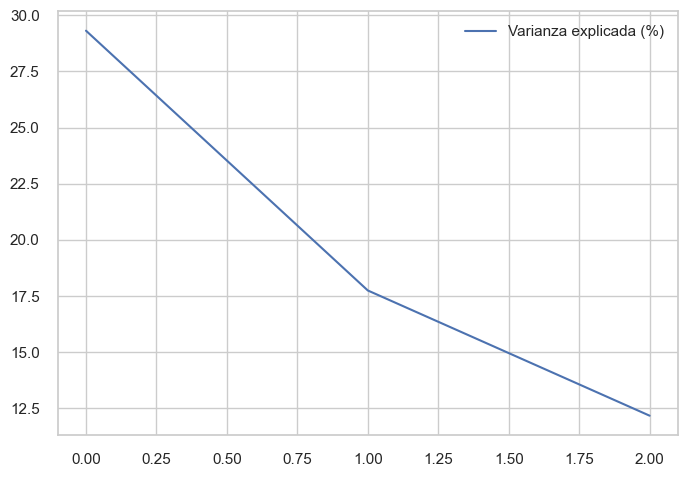

In [ ]:
# --- Varianza explicada ---
PCA_variance = pd.DataFrame({'Varianza explicada (%)':
                             pca.explained_variance_ratio_*100})
PCA_variance.plot()
#fig, ax = plt.subplots(1, 1, figsize = (7, 5))

"""bar = sns.barplot(x = ['PC' + str(i) for i in range(1, 5)],
                  y = PCA_variance['Varianza explicada (%)'],
                  linewidth = 1.5, edgecolor = 'k', color = '#4bafb8',
                  alpha = 0.8)"""

plt.show()


Varianza explicada por los componentes

In [ ]:
PCA_variance

Varianza explicada (%)
0               29.314575
1               17.742800
2               12.164507
3               10.661658
4                8.736074
5                6.734162

Transformacion

In [ ]:
train_pca=pca.fit_transform(train)

In [ ]:
import warnings
# Suprimir las advertencias relacionadas con K-Means
warnings.filterwarnings("ignore", category=FutureWarning)

# Modelo k-means PCA 80%

Grafico de inercia

In [ ]:
# Número optimo de K
inertia_list = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=3)
    kmeans.fit(train_pca)
    inertia_list.append(kmeans.inertia_)

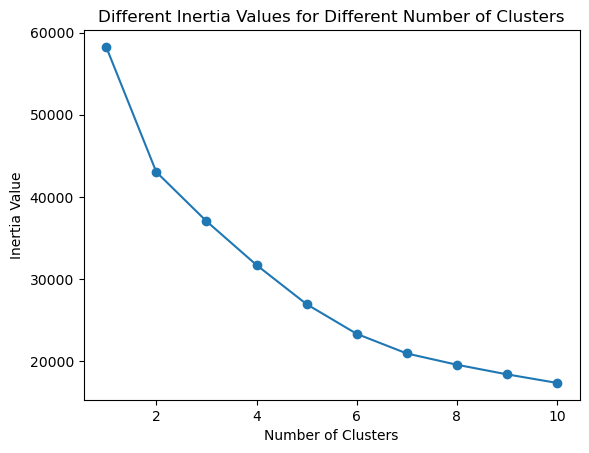

In [ ]:
# plot the inertia curve
plt.plot(range(1,11),inertia_list)
plt.scatter(range(1,11),inertia_list)
plt.xlabel("Number of Clusters", size=10)
plt.ylabel("Inertia Value", size=10)
plt.title("Different Inertia Values for Different Number of Clusters", size=12)
plt.show()

La grafica recomienda dos, cinco o seis cluster

Metodo del codo

In [ ]:
# Argumentos del algoritmo kmeans
kmeans_kwargs = {"init": "k-means++", "n_init": 10, "max_iter": 300, "random_state": 42}
# Lista que almacena los valores de SSE para cada valor K, metricas de evaluacion
sse = []
# Ciclo para entrenar algoritmos de kmeans con cada valor de k
for k in range(1, 15):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(train_pca)
  sse.append(kmeans.inertia_)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


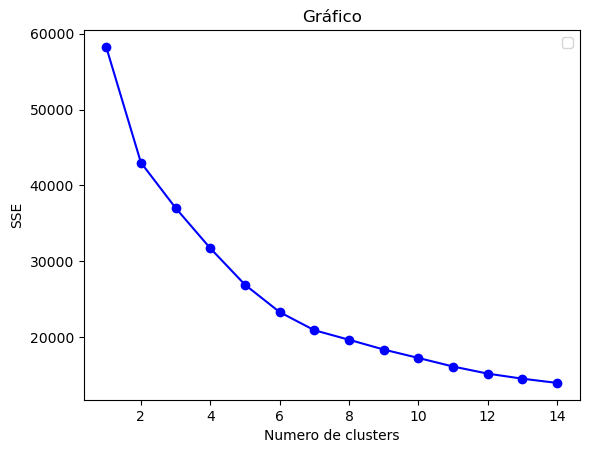

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.arange(1,15), sse, color='blue', marker='o')

# Personalizar el gráfico
ax.set_title('Gráfico')
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('SSE')
ax.legend()

# Mostrar el gráfico
plt.show()

El codo puede estar ubicado en 6 o 7 cluster

Grafico de silueta

In [ ]:
# Lista contiene los coeficientes de silueta para cada k
silhouette_coefficients = []
# Fíjate que empiezas con 2 grupos para el coeficiente de silueta
for k in range(2, 15):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(train_pca)
  score = silhouette_score(train_pca, kmeans.labels_)
  silhouette_coefficients.append(score)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


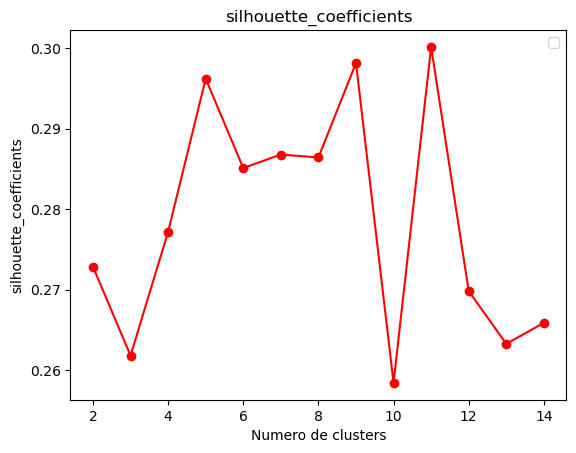

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.arange(2,15), silhouette_coefficients, color='red', marker='o')

# Personalizar el gráfico
ax.set_title('silhouette_coefficients')
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('silhouette_coefficients')
ax.legend()

# Mostrar el gráfico
plt.show()

El mejor esta ubicado en 11 cluster, sin embargo son muchos cluster, por lo tanto se recomiendan 5

In [ ]:
# Seleccion automatica del numero k
kl = KneeLocator(range(1, 15),
                 sse, curve="convex",
                 direction="decreasing")

kl.elbow

6

La prueba recomienda 6 cluster, para este modelo se probara con 5 cluster

Construccion del modelo y metricas


In [ ]:
#Modelo kmeans
kmeans = KMeans(init='k-means++',
                n_clusters=5,
                n_init=10,
                max_iter=100,
                random_state=42)
# Ajuste de algoritmo a caracteristicas escaladas
kmeans.fit(train_pca)
# Coordenadas de los centroides
print(kmeans.cluster_centers_)
# Numero de interaciones necesarias para converger
print("Numero de iteraciones: ",kmeans.n_iter_)
#Metricas
print('Inertia: ', kmeans.inertia_)
print('Silhouette Score: ', silhouette_score(train_pca, kmeans.labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(train_pca, kmeans.labels_))

[[-0.76545911 -1.16847589  2.78088059  0.78464896 -0.49465601  0.23857972]
 [ 1.7598856   1.1231873  -0.31306567  1.1742831  -0.7145034  -0.24213678]
 [-1.42236607  0.49280286 -0.27501173 -0.2362317   0.02901168 -0.28941844]
 [-0.44167999 -1.61504212 -0.87700327  0.6218047   0.35154818  0.58389539]
 [ 1.54202634 -0.06351843  0.17255139 -0.92107818  0.32246668  0.14909022]]
Numero de iteraciones:  7
Inertia:  26927.8437481303
Silhouette Score:  0.29619428370159107
Calinski harabasz score:  2150.8156205530145


Este modelo mejoro todas las metricas obtenidas a partir del modelo anterior que utilizaba todas las variables. Se concluye que el PCA con las componentes que explican el 80% de la varianza mejora los resultados.

Se agrega a la tabla final


In [ ]:
#Predecir valores de etiquetas
cluster_2 = kmeans.fit_predict(train_pca)
tablafinal["cluster_2"]=cluster_2

Comprobacion

In [ ]:
tablafinal["cluster_2"].value_counts()

2    2741
4    1908
1    1075
3    1066
0     609
Name: cluster_2, dtype: int64

# Reduccion de la dimensionalidad con PCA de 3 componente


Se instancia la clase

In [ ]:
pca = PCA(n_components=3).fit(train)
pca.n_components_

3

"bar = sns.barplot(x = ['PC ' + str(i) for i in range(1, 12)],\n                  y = PCA_variance['Varianza explicada (%)'],\n                  linewidth = 1.5, edgecolor = 'k', color = '#4bafb8',\n                  alpha = 0.8)\n\nplt.show()"

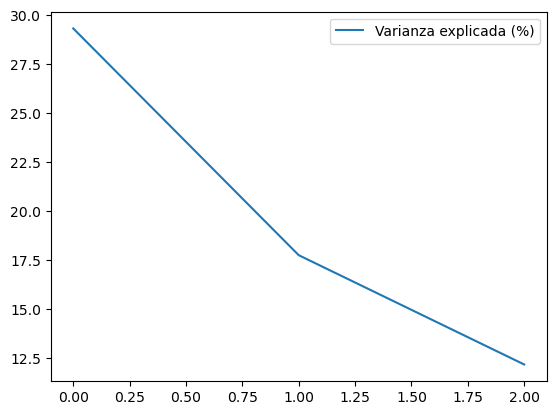

In [ ]:
# --- Varianza explicada ---
PCA_variance = pd.DataFrame({'Varianza explicada (%)':
                             pca.explained_variance_ratio_*100})
PCA_variance.plot()
#fig, ax = plt.subplots(1, 1, figsize = (7, 5))

"""bar = sns.barplot(x = ['PC ' + str(i) for i in range(1, 12)],
                  y = PCA_variance['Varianza explicada (%)'],
                  linewidth = 1.5, edgecolor = 'k', color = '#4bafb8',
                  alpha = 0.8)

plt.show()"""

Varianza explicada por las componentes

In [ ]:
PCA_variance

Varianza explicada (%)
0               29.314575
1               17.742800
2               12.164507

Transformacion

In [ ]:
train_pca1=pca.fit_transform(train)

## Cargas de las variables en las componentes

Tabla con componentes

In [ ]:
tablacargas = train.copy()
tablacargas['PCA1'] = train_pca1[:,0]
tablacargas['PCA2'] = train_pca1[:,1]
tablacargas['PCA3'] = train_pca1[:,2]
tablacargas.head(10)

variable     saldo  frecuenciaactsaldo  comprastotales  montomaxcomprado  \
0        -0.731989           -0.249434       -0.424900         -0.356934   
1         0.786961            0.134325       -0.469552         -0.356934   
2         0.447135            0.518084       -0.107668          0.108889   
3         0.049099           -1.016953        0.232058          0.546189   
4        -0.358775            0.518084       -0.462063         -0.347294   
5         0.117878            0.518084        0.154492         -0.356934   
7         0.124520            0.518084       -0.265388         -0.356934   
8        -0.264026            0.518084       -0.066330          0.041603   
9        -0.678504           -1.400712        0.130303          0.415209   
10       -0.130368            0.518084       -0.038888         -0.356934   

variable  montoacuotas  anticipoefectivo  frecuenciacompras  \
0            -0.349079         -0.466786          -0.806490   
1            -0.454576          2.605605          -1.221758   
2            -0.454576         -0.466786           1.269843   
3            -0.454576         -0.368653          -1.014125   
4            -0.454576         -0.466786          -1.014125   
5             1.019822         -0.466786           0.439310   
7             0.027792         -0.466786           1.269843   
8            -0.233408         -0.466786          -0.391225   
9            -0.454576         -0.466786          -0.806490   
10            0.562932         -0.466786           1.269843   

variable  freccomprasunavez  freccomprasplazo  frecpagoantefectivo  \
0                 -0.678661         -0.707313            -0.675349   
1                 -0.678661         -0.916995             0.573963   
2                  2.673451         -0.916995            -0.675349   
3                 -0.399319         -0.916995            -0.258913   
4                 -0.399319         -0.916995            -0.675349   
5                 -0.678661          0.550784            -0.675349   
7                 -0.678661          1.599199            -0.675349   
8                 -0.399319         -0.287947            -0.675349   
9                 -0.119974         -0.916995            -0.675349   
10                -0.678661          1.599199            -0.675349   

variable  ntranscashinadv  ntransacciones  limtarjetacredito     pagos  \
0               -0.476070       -0.511333          -0.960433 -0.528979   
1                0.110074       -0.591796           0.688639  0.818642   
2               -0.476070       -0.109020           0.826062 -0.383805   
3               -0.329534       -0.551565           0.826062 -0.598688   
4               -0.476070       -0.551565          -0.905464 -0.364368   
5               -0.476070       -0.269945          -0.740557 -0.115060   
7               -0.476070       -0.109020          -0.603134 -0.364116   
8               -0.476070       -0.390639           0.688639 -0.360933   
9               -0.476070       -0.471102           1.788021 -0.196336   
10              -0.476070       -0.109020          -0.905464 -0.224478   

variable  montominpagos  %totalpagado  antiguedad      PCA1      PCA2  \
0         -3.109675e-01     -0.525551     0.36068 -0.889087 -1.138819   
1          8.931021e-02      0.234227     0.36068 -2.100566  1.256234   
2         -1.016632e-01     -0.525551     0.36068  1.173744  1.655462   
3          4.878305e-17     -0.525551     0.36068 -1.142053 -0.214600   
4         -2.657913e-01     -0.525551     0.36068 -1.054330 -0.544669   
5          6.621186e-01     -0.525551     0.36068  0.728893  0.193419   
7         -1.425353e-01     -0.525551     0.36068  1.517890  0.220153   
8         -2.369677e-01     -0.525551     0.36068 -0.162109  0.238701   
9         -3.277915e-01     -0.525551     0.36068 -0.652051 -0.464980   
10         5.614739e-01     -0.525551     0.36068  1.650011  0.152436   

variable      PCA3  
0        -0.823141  
1        -0.150775  
2        -0.8417

matriz de correlacion entre componentes y variables

<Axes: xlabel='variable', ylabel='variable'>

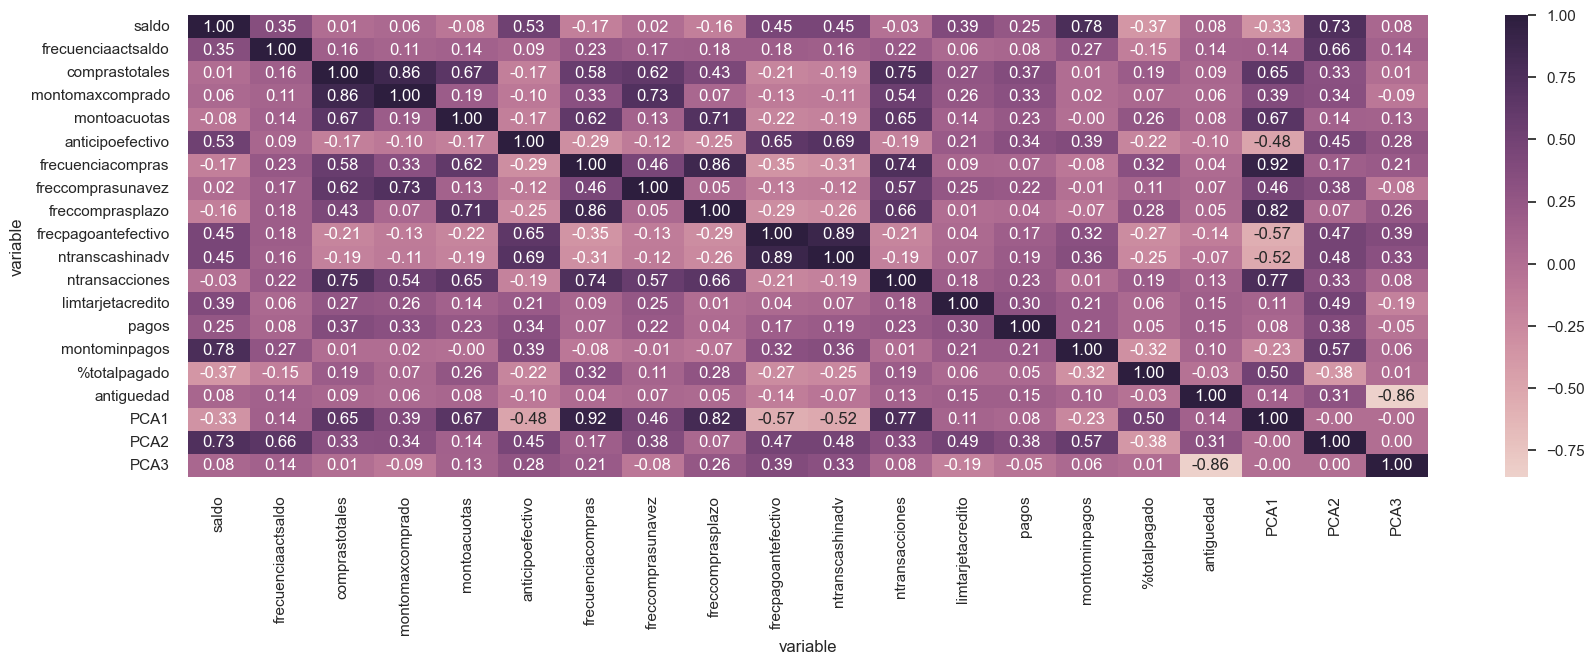

In [ ]:
figure(figsize=(20,6))
sns.heatmap(tablacargas.corr(),cmap = sns.cubehelix_palette(as_cmap=True), annot = True, fmt = ".2f")

las variables que mas se relacionan en mayor medida con la componente uno son: compras totales, monto a cuotas, frecuencia compras, frecuencia compras a plazo, numero de transacciones, con la componente dos son: saldo, frecuencia actualizacion del saldo, monto minimo de pagos y por ultimo con la componente tres son: antiguedad. 

Pesos de las variables

In [ ]:
# --- Pesos de las variables que componen las componentes principales ---
pesospca = pd.DataFrame(pca.components_, columns = train.columns,
             index = ['PC 1', 'PC 2', 'PC 3']).round(2).T.reset_index()

pesospca

variable  PC 1  PC 2  PC 3
0                 saldo -0.15  0.42  0.05
1    frecuenciaactsaldo  0.08  0.48  0.12
2        comprastotales  0.14  0.09  0.00
3      montomaxcomprado  0.08  0.09 -0.03
4          montoacuotas  0.19  0.05  0.06
5      anticipoefectivo -0.17  0.21  0.15
6     frecuenciacompras  0.55  0.13  0.19
7     freccomprasunavez  0.26  0.28 -0.07
8      freccomprasplazo  0.48  0.05  0.24
9   frecpagoantefectivo -0.29  0.31  0.31
10      ntranscashinadv -0.17  0.20  0.17
11       ntransacciones  0.24  0.13  0.04
12    limtarjetacredito  0.06  0.33 -0.15
13                pagos  0.02  0.12 -0.02
14        montominpagos -0.03  0.11  0.01
15         %totalpagado  0.30 -0.29  0.01
16           antiguedad  0.09  0.25 -0.84

Grafico de la magnitud (No la direccion)

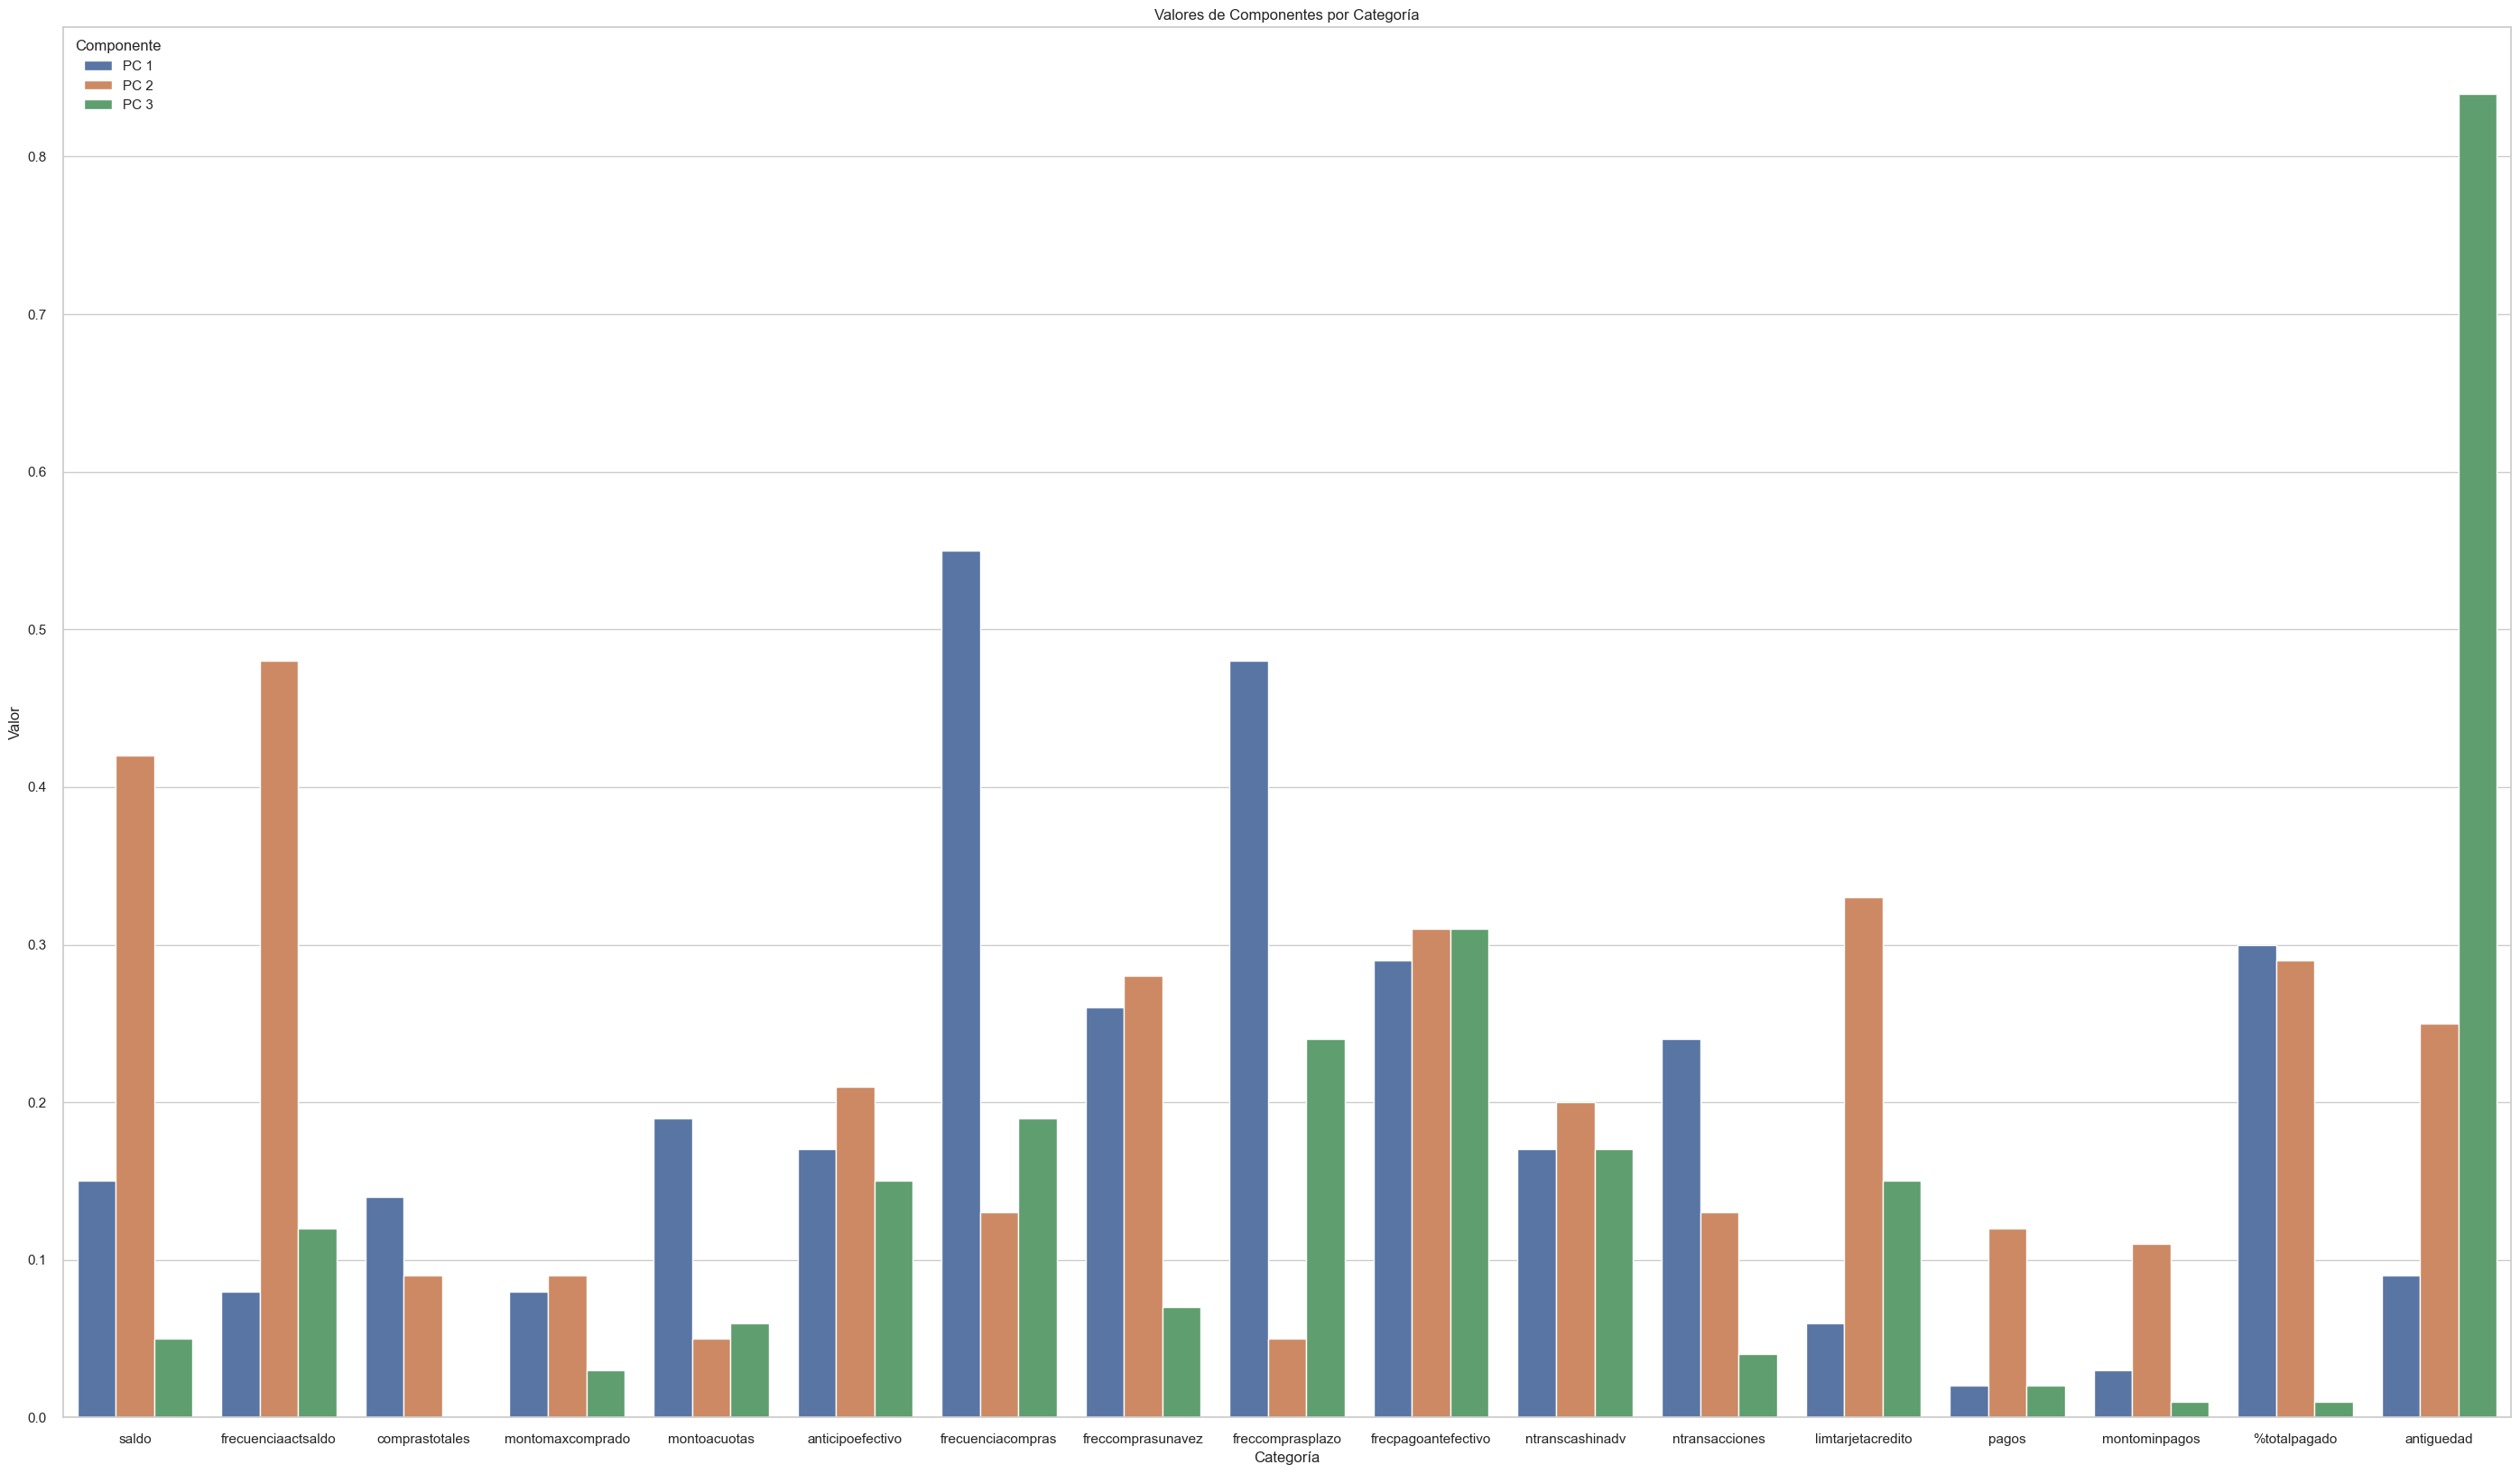

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pesospca = pesospca.apply(lambda x: x.abs() if pd.api.types.is_numeric_dtype(x) else x)
# Reorganizar el DataFrame para que sea adecuado para un gráfico de barras apiladas
df_melted = pd.melt(pesospca, id_vars='variable', var_name='categoria', value_name='Valor')

# Crear un gráfico de barras apiladas
sns.set(style='whitegrid')
plt.figure(figsize=(35, 20))
sns.barplot(x='variable', y='Valor', hue='categoria', data=df_melted)

plt.title('Valores de Componentes por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Valor')
plt.legend(title='Componente')
plt.show()

# Modelo de k-means con PCA 3 componentes - 3 cluster

 Grafico de inercia

In [ ]:
# Número optimo de K
inertia_list = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(train_pca1)
    inertia_list.append(kmeans.inertia_)

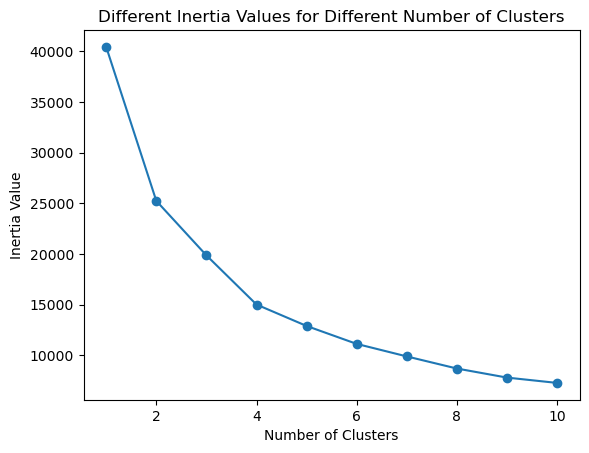

In [ ]:
# plot the inertia curve
plt.plot(range(1,11),inertia_list)
plt.scatter(range(1,11),inertia_list)
plt.xlabel("Number of Clusters", size=10)
plt.ylabel("Inertia Value", size=10)
plt.title("Different Inertia Values for Different Number of Clusters", size=12)
plt.show()

4 cluster

Metodo del codo

In [ ]:
# Argumentos del algoritmo kmeans
kmeans_kwargs = {"init": "k-means++", "n_init": 10, "max_iter": 300, "random_state": 42}
# Lista que almacena los valores de SSE para cada valor K, metricas de evaluacion
sse = []
# Ciclo para entrenar algoritmos de kmeans con cada valor de k
for k in range(1, 15):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(train_pca1)
  sse.append(kmeans.inertia_)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


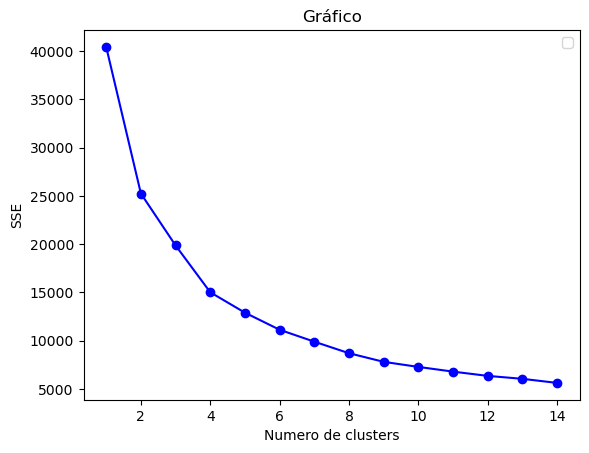

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.arange(1,15), sse, color='blue', marker='o')

# Personalizar el gráfico
ax.set_title('Gráfico')
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('SSE')
ax.legend()

# Mostrar el gráfico
plt.show()

4 Cluster

Grafico de silueta

In [ ]:
# Lista contiene los coeficientes de silueta para cada k
silhouette_coefficients = []
# Fíjate que empiezas con 2 grupos para el coeficiente de silueta
for k in range(2, 15):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(train_pca1)
  score = silhouette_score(train_pca1, kmeans.labels_)
  silhouette_coefficients.append(score)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


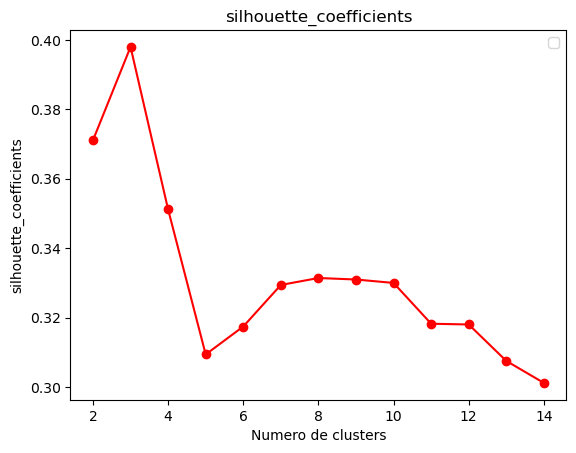

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.arange(2,15), silhouette_coefficients, color='red', marker='o')

# Personalizar el gráfico
ax.set_title('silhouette_coefficients')
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('silhouette_coefficients')
ax.legend()

# Mostrar el gráfico
plt.show()

Este grafico a comparacion de los anteriores recomienda solo 3 cluster

In [ ]:
# Seleccion automatica del numero k
kl = KneeLocator(range(1, 15),
                 sse, curve="convex",
                 direction="decreasing")

kl.elbow

4

La prueba recomienda 4 cluster

Construccion del modelo y metricas

In [ ]:
#Modelo kmeans
kmeans = KMeans(init="random",
                n_clusters=3,
                n_init=10,
                max_iter=100,
                random_state=42)
# Ajuste de algoritmo a caracteristicas escaladas
kmeans.fit(train_pca1)
# Coordenadas de los centroides
print(kmeans.cluster_centers_)
# Numero de interaciones necesarias para converger
print("Numero de iteraciones: ",kmeans.n_iter_)
#Metricas
print('Inertia: ', kmeans.inertia_)
print('Silhouette Score: ', silhouette_score(train_pca1, kmeans.labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(train_pca1, kmeans.labels_))

[[-7.24845365e-01 -1.19747372e+00  2.68531108e+00]
 [ 1.63662871e+00  2.60213768e-01 -3.37216748e-02]
 [-1.21160818e+00 -4.88688705e-04 -4.49160661e-01]]
Numero de iteraciones:  13
Inertia:  19862.29443530416
Silhouette Score:  0.39789449052865955
Calinski harabasz score:  3828.014306215167


Las 3 componentes principales que explican alrededor del 60% de la varianza original mejor0 las 3 metricas de los modelos anteriores.

Se agrega a la tabla final

In [ ]:
#Predecir valores de etiquetas
cluster_3 = kmeans.fit_predict(train_pca1)
tablafinal["cluster_3"]=cluster_3

Comprobacion

In [ ]:
tablafinal["cluster_3"].unique()

array([2, 1, 0])

Grafico

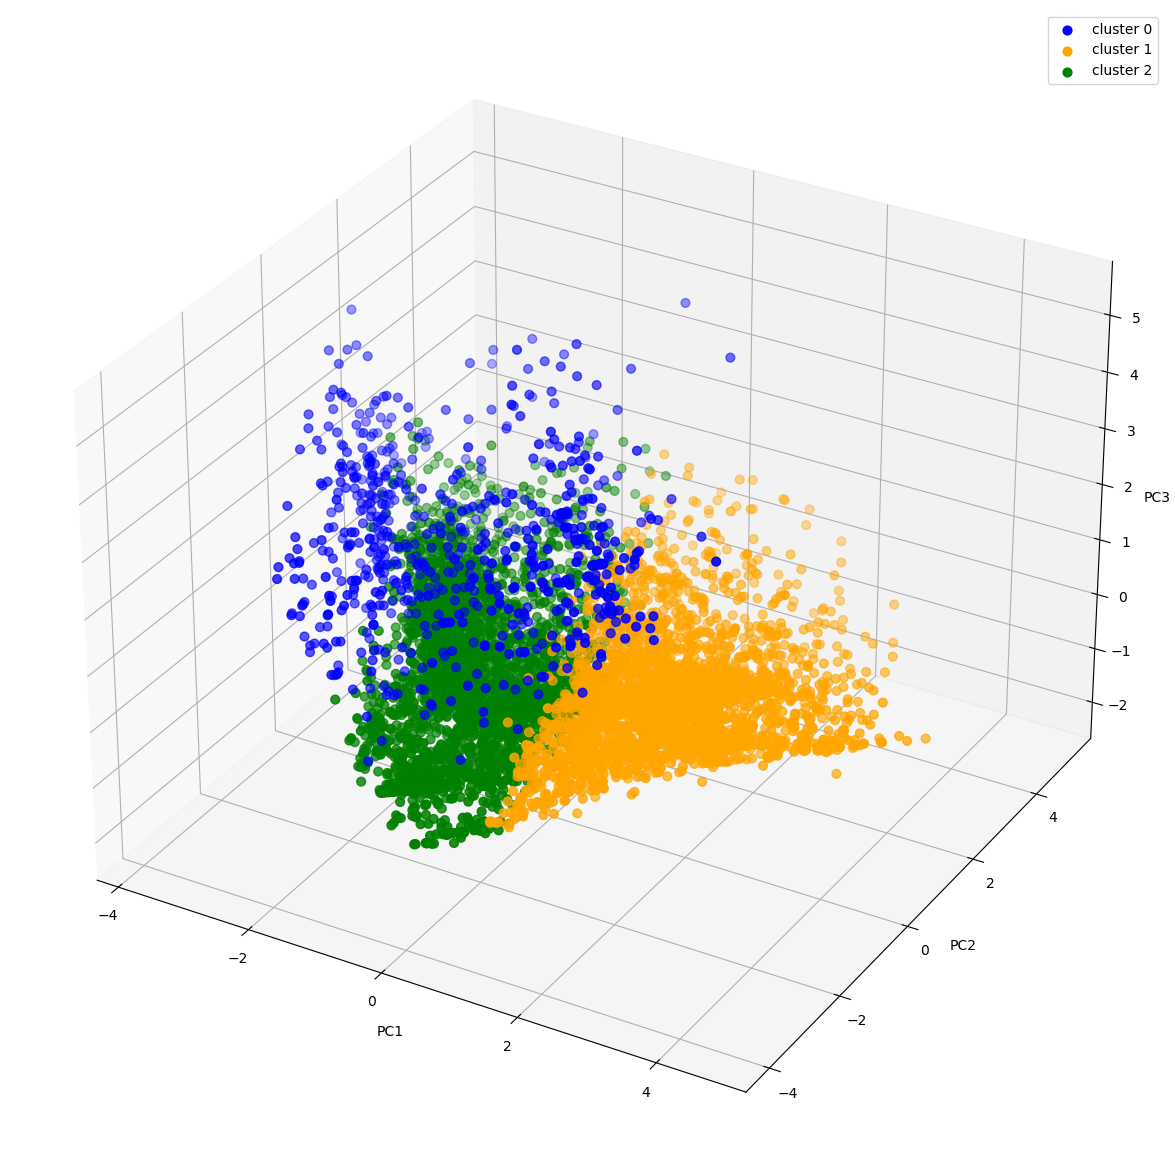

In [ ]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_pca1[cluster_3 == 0,0],train_pca1[cluster_3== 0,1],train_pca1[cluster_3== 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(train_pca1[cluster_3 == 1,0],train_pca1[cluster_3== 1,1],train_pca1[cluster_3== 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(train_pca1[cluster_3== 2,0],train_pca1[cluster_3== 2,1],train_pca1[cluster_3== 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

Algunos puntos del cluster azul se estan traslapando con los demas clusters, sin embargo se pueden observar los diferentes clusters generados por el modelo

Vision de los clusters con solo dos dimensiones PC1 Y pc2

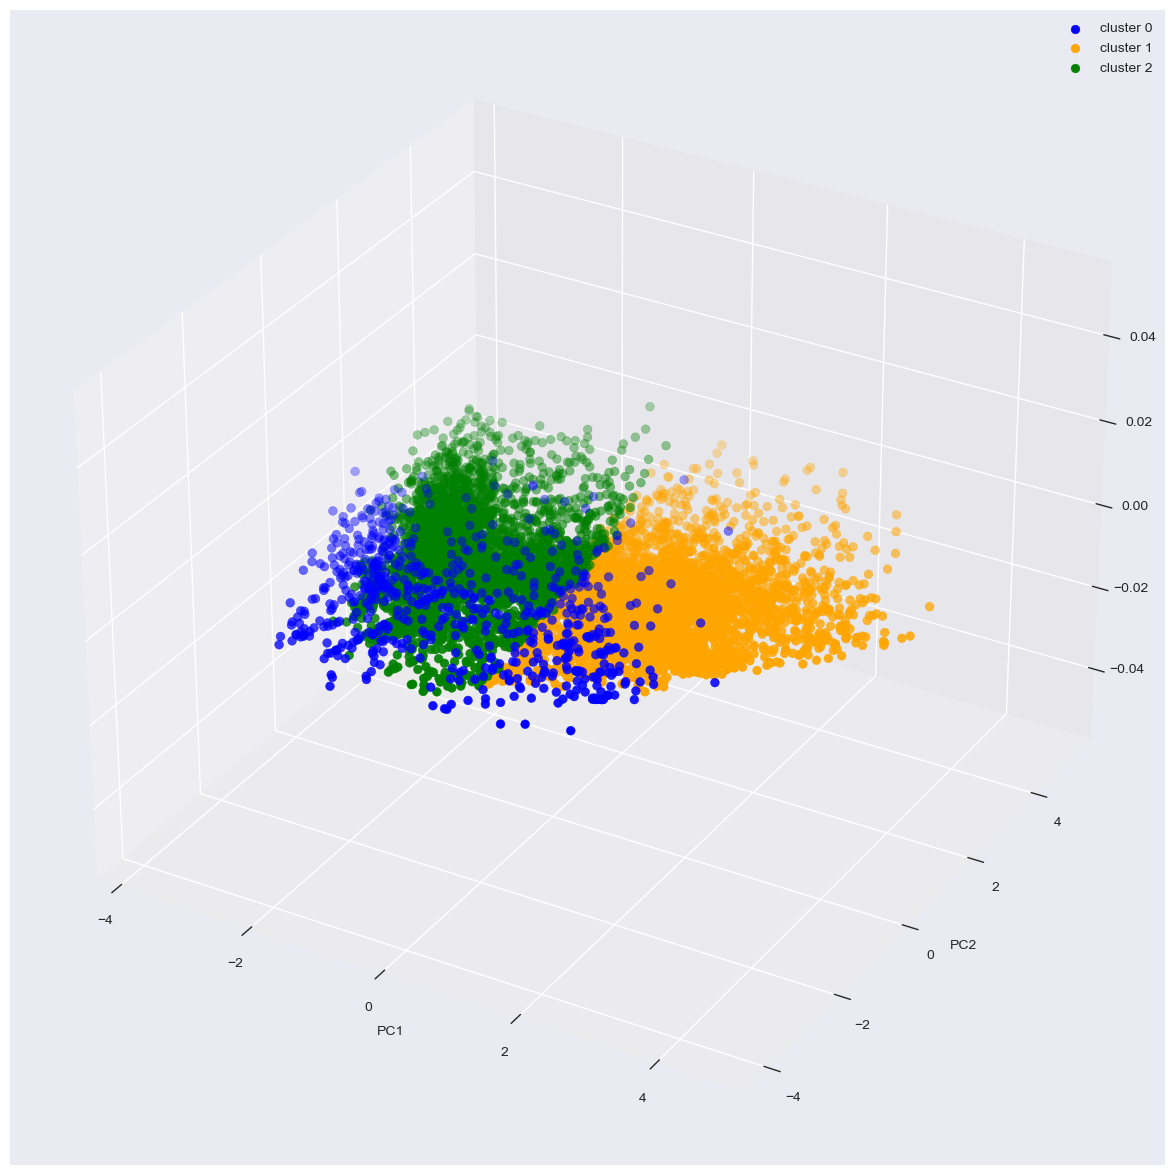

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_pca1[cluster_3 == 0,0],train_pca1[cluster_3== 0,1], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(train_pca1[cluster_3 == 1,0],train_pca1[cluster_3== 1,1], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(train_pca1[cluster_3 == 2,0],train_pca1[cluster_3== 2,1], s = 40 , color = 'green', label = "cluster 2")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()
plt.show()

Se observa en mayor medida que los cluster se traslapan

Vision desde PC2 y PC3

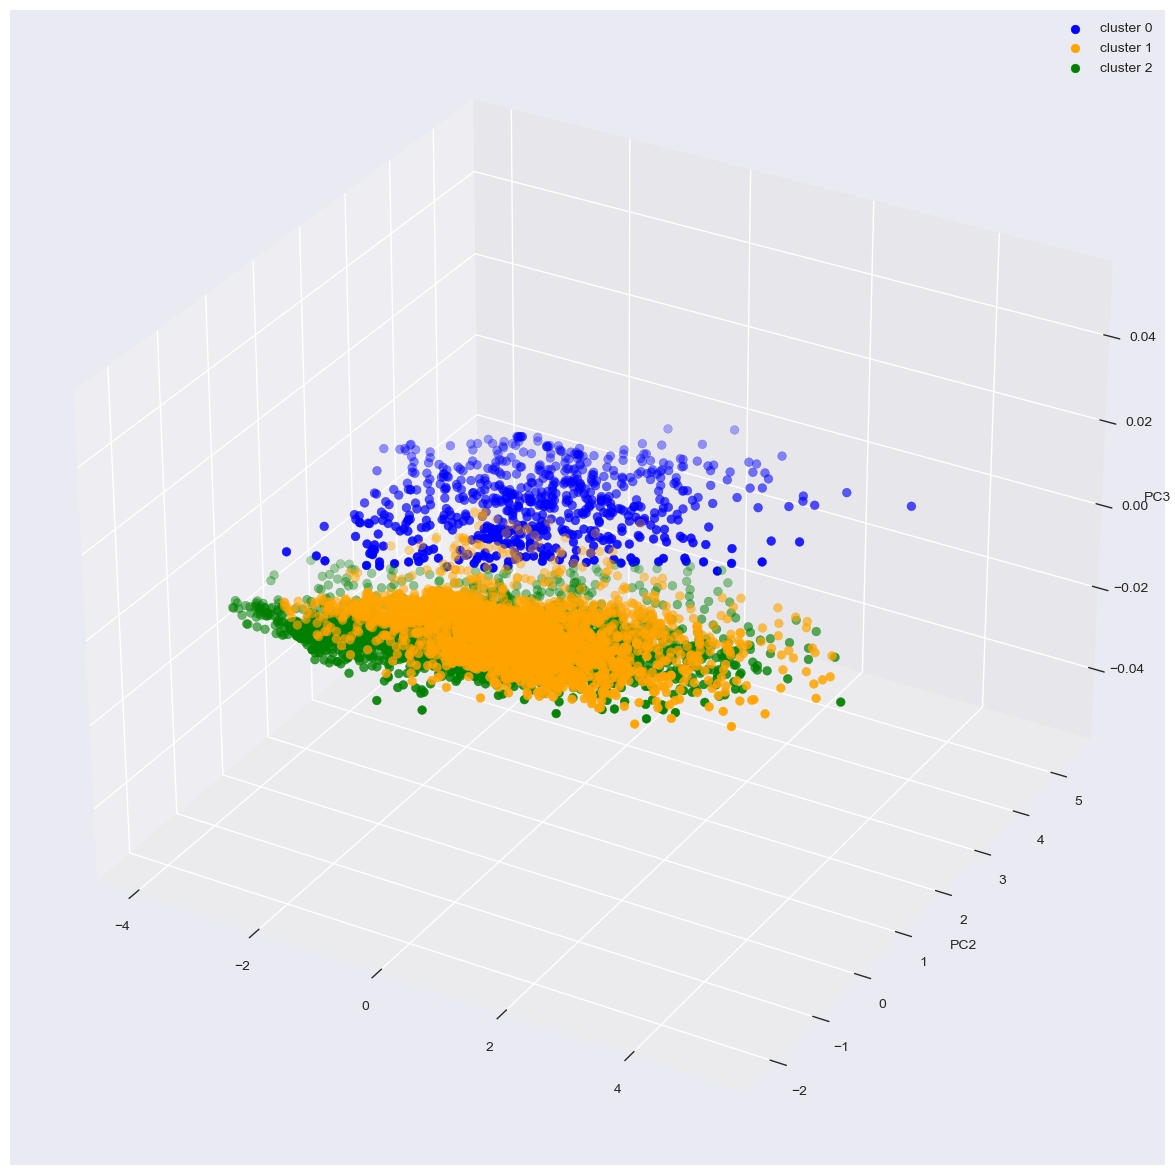

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_pca1[cluster_3== 0,1],train_pca1[cluster_3== 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(train_pca1[cluster_3== 1,1],train_pca1[cluster_3== 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(train_pca1[cluster_3== 2,1],train_pca1[cluster_3== 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

Los clusters en algunos puntos se traslapan, finalmente aunque el modelo tiene problemas con las agrupaciones se considero este como el mejor modelo

# Modelo de k-means con PCA 3 componentes - 4 cluster

Modelo con 4 cluster

Construccion del modelo y metricas

In [ ]:
#Modelo kmeans
kmeans = KMeans(init="random",
                n_clusters=4,
                n_init=10,
                max_iter=100,
                random_state=42)
# Ajuste de algoritmo a caracteristicas escaladas
kmeans.fit(train_pca)
# Coordenadas de los centroides
print(kmeans.cluster_centers_)
# Numero de interaciones necesarias para converger
print("Numero de iteraciones: ",kmeans.n_iter_)
#Metricas
print('Inertia: ', kmeans.inertia_)
print('Silhouette Score: ', silhouette_score(train_pca, kmeans.labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(train_pca, kmeans.labels_))

[[-6.78000812e-01 -1.24773274e+00  2.70471994e+00  7.92351277e-01
  -5.19572142e-01  2.56912932e-01]
 [-7.60297957e-01 -6.60932273e-01 -6.84706480e-01 -4.03840615e-02
  -2.07784265e-01  1.10297781e-02]
 [-1.72419593e+00  1.37105438e+00  1.48158362e-01  3.48605821e-02
   6.39500136e-01 -1.43108869e-01]
 [ 1.78620108e+00  3.05697478e-01  1.44183178e-03 -1.60918358e-01
   2.41414340e-02 -1.70544164e-03]]
Numero de iteraciones:  15
Inertia:  31699.271317853454
Silhouette Score:  0.24367563444346518
Calinski harabasz score:  2065.393155916754


A comparacion del modelo anterior intentar las agrupar con 4 cluster desemejora todas las metricas, por lo tanto se continua con el anterior.

Se guarda en la tabla

In [ ]:
#Predecir valores de etiquetas
cluster_4 = kmeans.fit_predict(train_pca1)
tablafinal["cluster_4"]=cluster_4

Comprobacion

In [ ]:
tablafinal["cluster_4"].unique()

array([2, 3, 1, 0])

Grafico

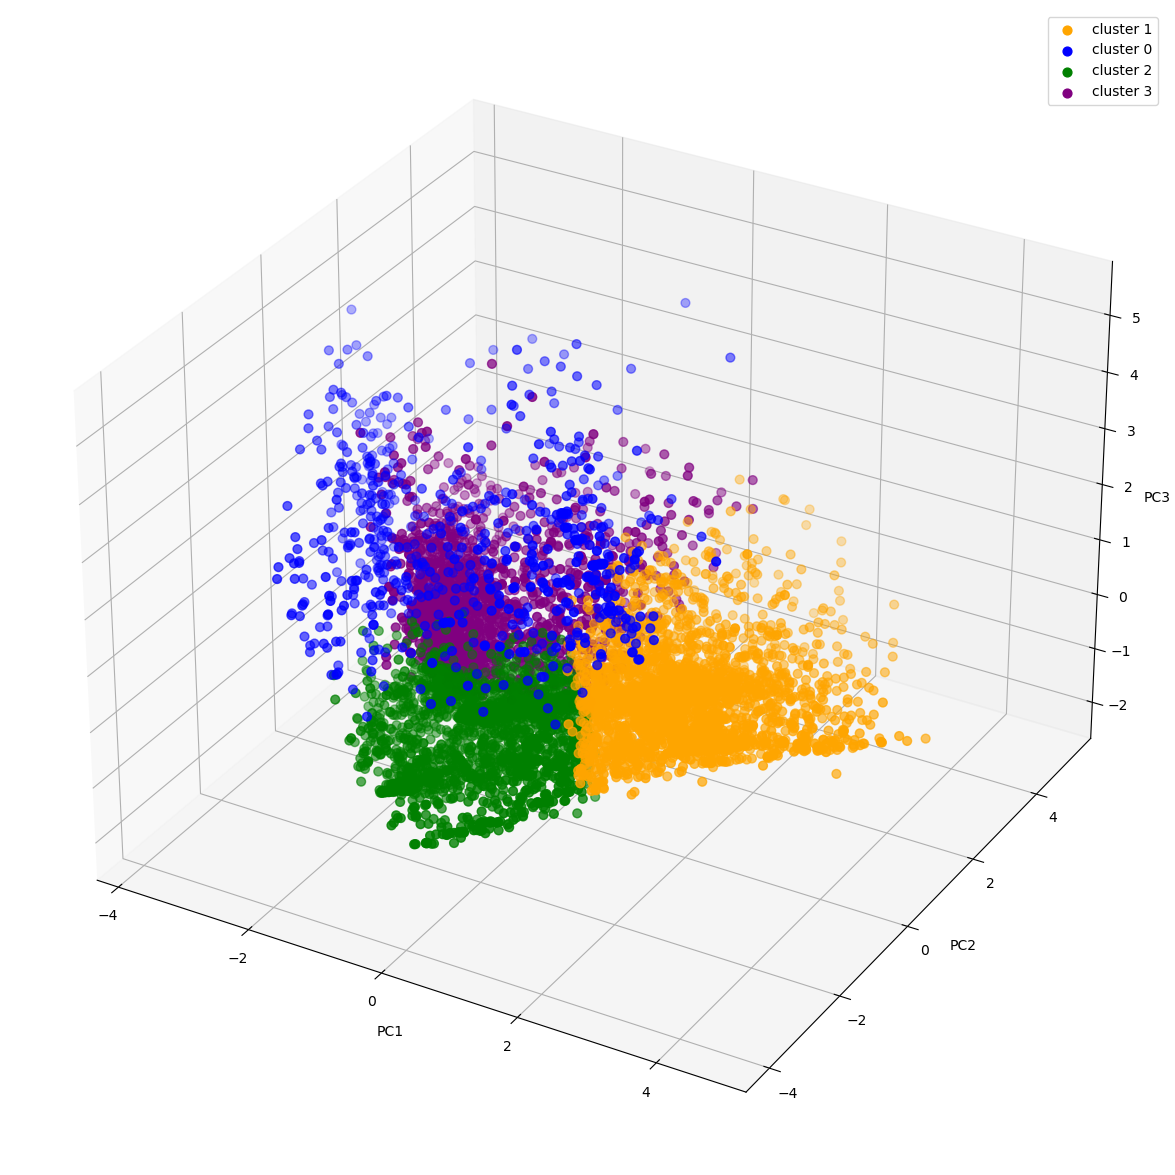

In [ ]:

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_pca1[cluster_4 == 1,0],train_pca1[cluster_4 == 1,1],train_pca1[cluster_4== 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(train_pca1[cluster_4 == 0,0],train_pca1[cluster_4 == 0,1],train_pca1[cluster_4 == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(train_pca1[cluster_4 == 2,0],train_pca1[cluster_4 == 2,1],train_pca1[cluster_4 == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(train_pca1[cluster_4 == 3,0],train_pca1[cluster_4 == 3,1],train_pca1[cluster_4 == 3,2], s = 40 , color = 'purple', label = "cluster 3")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

Graficamente se obtienen resultados similares al modelo con solo 3 cluster, igualmente se traslapan los cluster.

# Mezclas gaussianas con PCA 80%

Estimacion de hiperparametros a partir del BIC Y AIC

Text(0.5, 0, 'Número de Clusters')

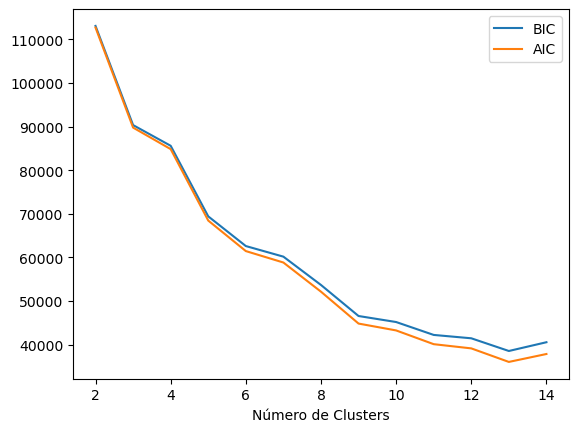

In [ ]:
# --- Estimación de hiperparámetros ---

n_components = np.arange(2, 15)

models_g = [GaussianMixture(n_components=n, random_state=123).fit(train_pca) for n in n_components]

plt.plot(n_components, [m.bic(train_pca) for m in models_g], label="BIC")
plt.plot(n_components, [m.aic(train_pca) for m in models_g], label="AIC")
plt.legend()
plt.xlabel("Número de Clusters")

En la grafica se pueden determinar 5 o 6 clusters

Se construye el modelo con la matriz de covarianza tipo full: matriz de covarianza completa o general

In [ ]:
model_gmm_pca = GaussianMixture(n_components=5, random_state=123, covariance_type = 'full').fit(train_pca) #se puede variar la matriz de covariaza
#es mas un metodo para entender distribuciones

Metricas

In [ ]:
# --- Evaluación del modelo GMM ---
labels_ = model_gmm_pca.predict(train_pca)
print(" ### DBSCAN ###")
print('Silhouette Score: ', silhouette_score(train_pca, labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(train_pca, labels_))

 ### DBSCAN ###


Silhouette Score:  0.04343907333630249
Calinski harabasz score:  911.1095406759299


Es el modelo con las peores metricas

Se guarda

In [ ]:
##Predecir valores de etiquetas
cluster_6 = model_gmm_pca.fit_predict(train_pca)
tablafinal["cluster_6"]=cluster_6

Comprobacion

In [ ]:
tablafinal["cluster_6"].value_counts()

2    2361
4    1573
0    1325
1    1292
3     848
Name: cluster_6, dtype: int64

# Mezclas gaussinas con PCA 3 componentes

Estimacion de hiperparametros a partir del grafico de BIC y AIC

Text(0.5, 0, 'Número de Clusters')

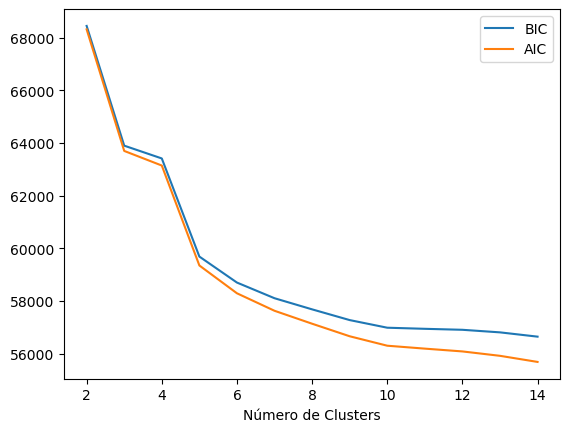

In [ ]:
# --- Estimación de hiperparámetros ---

n_components = np.arange(2, 15)

models_g = [GaussianMixture(n_components=n, random_state=123).fit(train_pca1) for n in n_components]

plt.plot(n_components, [m.bic(train_pca1) for m in models_g], label="BIC")
plt.plot(n_components, [m.aic(train_pca1) for m in models_g], label="AIC")
plt.legend()
plt.xlabel("Número de Clusters")

Se recomiendan 5 cluster

Construccion del modelo con matriz de covarianza tipo full: matriz de covarianza completa o general


In [ ]:
model_gmm_pca = GaussianMixture(n_components=5, random_state=123, covariance_type = 'full').fit(train_pca1) #se puede variar la matriz de covariaza
#es mas un metodo para entender distribuciones

Metricas

In [ ]:
# --- Evaluación del modelo GMM ---
labels_ = model_gmm_pca.predict(train_pca1)
print(" ### DBSCAN ###")
print('Silhouette Score: ', silhouette_score(train_pca1, labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(train_pca1, labels_))

 ### DBSCAN ###
Silhouette Score:  0.11550915583847399
Calinski harabasz score:  1893.8180072011974


Este modelo generado a partir de solo las tres componentes mejora los resultados del anterior modelo, sin embargo comparado con los modelos de k-means se obtiener peores metricas

Se guarda en la tabla final

In [ ]:
##Predecir valores de etiquetas
cluster_7 = model_gmm_pca.fit_predict(train_pca1)
tablafinal["cluster_7"]=cluster_7

Comprobacion

In [ ]:
tablafinal["cluster_7"].value_counts()

3    2382
2    2102
1    1145
0     941
4     829
Name: cluster_7, dtype: int64

Grafico

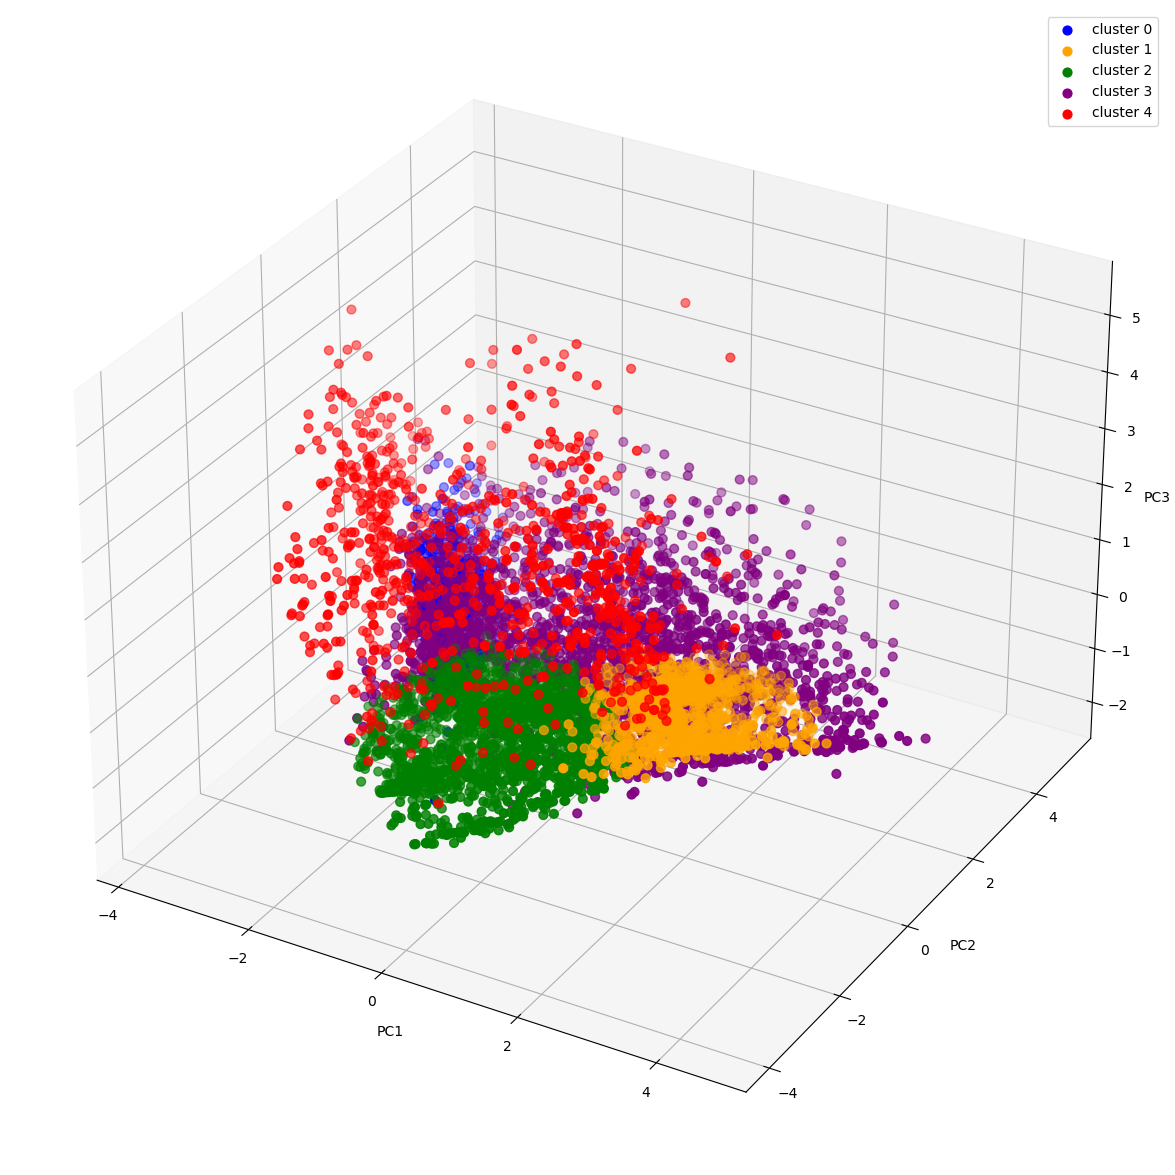

In [ ]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_pca1[cluster_7 == 0,0],train_pca1[cluster_7 == 0,1],train_pca1[cluster_7 == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(train_pca1[cluster_7 == 1,0],train_pca1[cluster_7 == 1,1],train_pca1[cluster_7 == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(train_pca1[cluster_7 == 2,0],train_pca1[cluster_7 == 2,1],train_pca1[cluster_7 == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(train_pca1[cluster_7 == 3,0],train_pca1[cluster_7 == 3,1],train_pca1[cluster_7 == 3,2], s = 40 , color = 'purple', label = "cluster 3")
ax.scatter(train_pca1[cluster_7 == 4,0],train_pca1[cluster_7 == 4,1],train_pca1[cluster_7 == 4,2], s = 40 , color = 'red', label = "cluster 4")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

Los cluster se estan traslapando en gran medida, ademos no se obtuvieron buenas metricas

Modelo con 'tied': Todos los componentes comparten una única matriz de covarianza completa.

In [ ]:
model_gmm_pca = GaussianMixture(n_components=4, random_state=123, covariance_type = 'tied').fit(train_pca1) 


Metricas

In [ ]:
# --- Evaluación del modelo GMM ---
labels_ = model_gmm_pca.predict(train_pca1)
print(" ### DBSCAN ###")
print('Silhouette Score: ', silhouette_score(train_pca1, labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(train_pca1, labels_))

 ### DBSCAN ###
Silhouette Score:  0.33939680354249724
Calinski harabasz score:  3471.8616740657963


Las metricas mejora a comparacion del modelo anterior, este tipo de matriz de covarianza mejora los resultados.

Se guarda

In [ ]:
##Predecir valores de etiquetas
cluster_7 = model_gmm_pca.fit_predict(train_pca1)
tablafinal["cluster_7"]=cluster_7

Comprobacion

In [ ]:
tablafinal["cluster_7"].value_counts()

2    3430
3    2715
1     652
0     602
Name: cluster_7, dtype: int64

Grafico

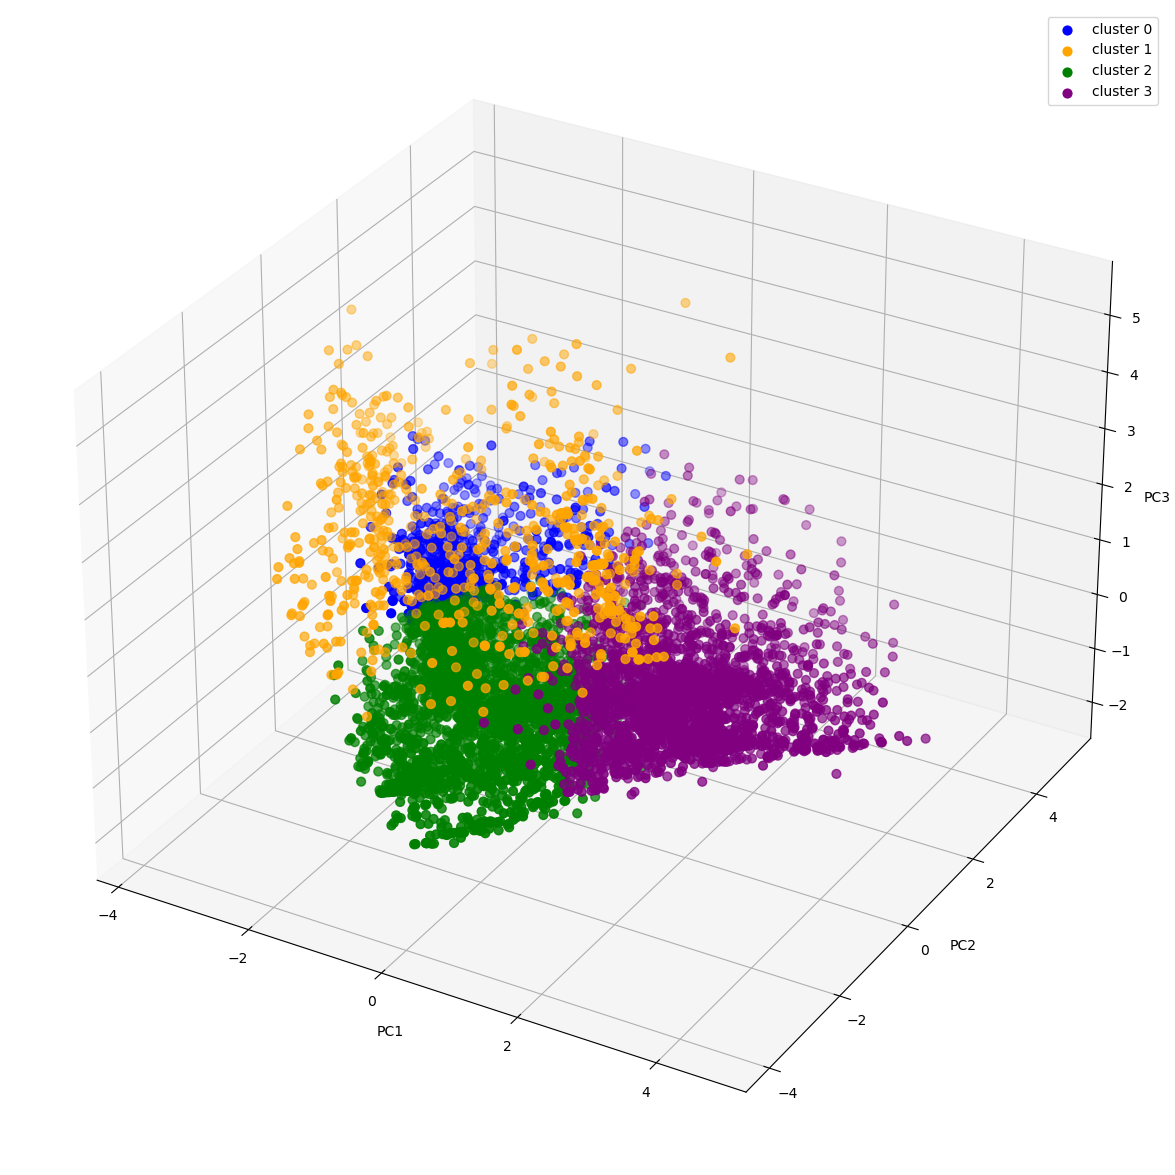

In [ ]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_pca1[cluster_7 == 0,0],train_pca1[cluster_7 == 0,1],train_pca1[cluster_7 == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(train_pca1[cluster_7 == 1,0],train_pca1[cluster_7 == 1,1],train_pca1[cluster_7 == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(train_pca1[cluster_7 == 2,0],train_pca1[cluster_7 == 2,1],train_pca1[cluster_7 == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(train_pca1[cluster_7 == 3,0],train_pca1[cluster_7 == 3,1],train_pca1[cluster_7 == 3,2], s = 40 , color = 'purple', label = "cluster 3")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

Graficamente se obtienen mejores resultados que el modelo anterior, sin embargo los cluster se observan mejor con los modelos de k-means

Modelo con matriz de covarianza tipo 'diag': Cada componente tiene una matriz de covarianza diagonal.

In [ ]:
model_gmm_pca = GaussianMixture(n_components=4, random_state=123, covariance_type = 'diag').fit(train_pca1) #se puede variar la matriz de covariaza
#es mas un metodo para entender distribuciones

Metricas

In [ ]:
# --- Evaluación del modelo GMM ---
labels_ = model_gmm_pca.predict(train_pca1)
print(" ### DBSCAN ###")
print('Silhouette Score: ', silhouette_score(train_pca1, labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(train_pca1, labels_))

 ### DBSCAN ###
Silhouette Score:  0.2896339448068252
Calinski harabasz score:  3053.9382111870927


Este modelo desmejora las metricas del modelo anterior, sin embargo es mejor que el primer modelo de mezclas.

Se guarda

In [ ]:
##Predecir valores de etiquetas
cluster_8 = model_gmm_pca.fit_predict(train_pca1)
tablafinal["cluster_8"]=cluster_8

Comprobacion

In [ ]:
tablafinal["cluster_8"].unique()

array([2, 0, 3, 1], dtype=int64)

Grafica

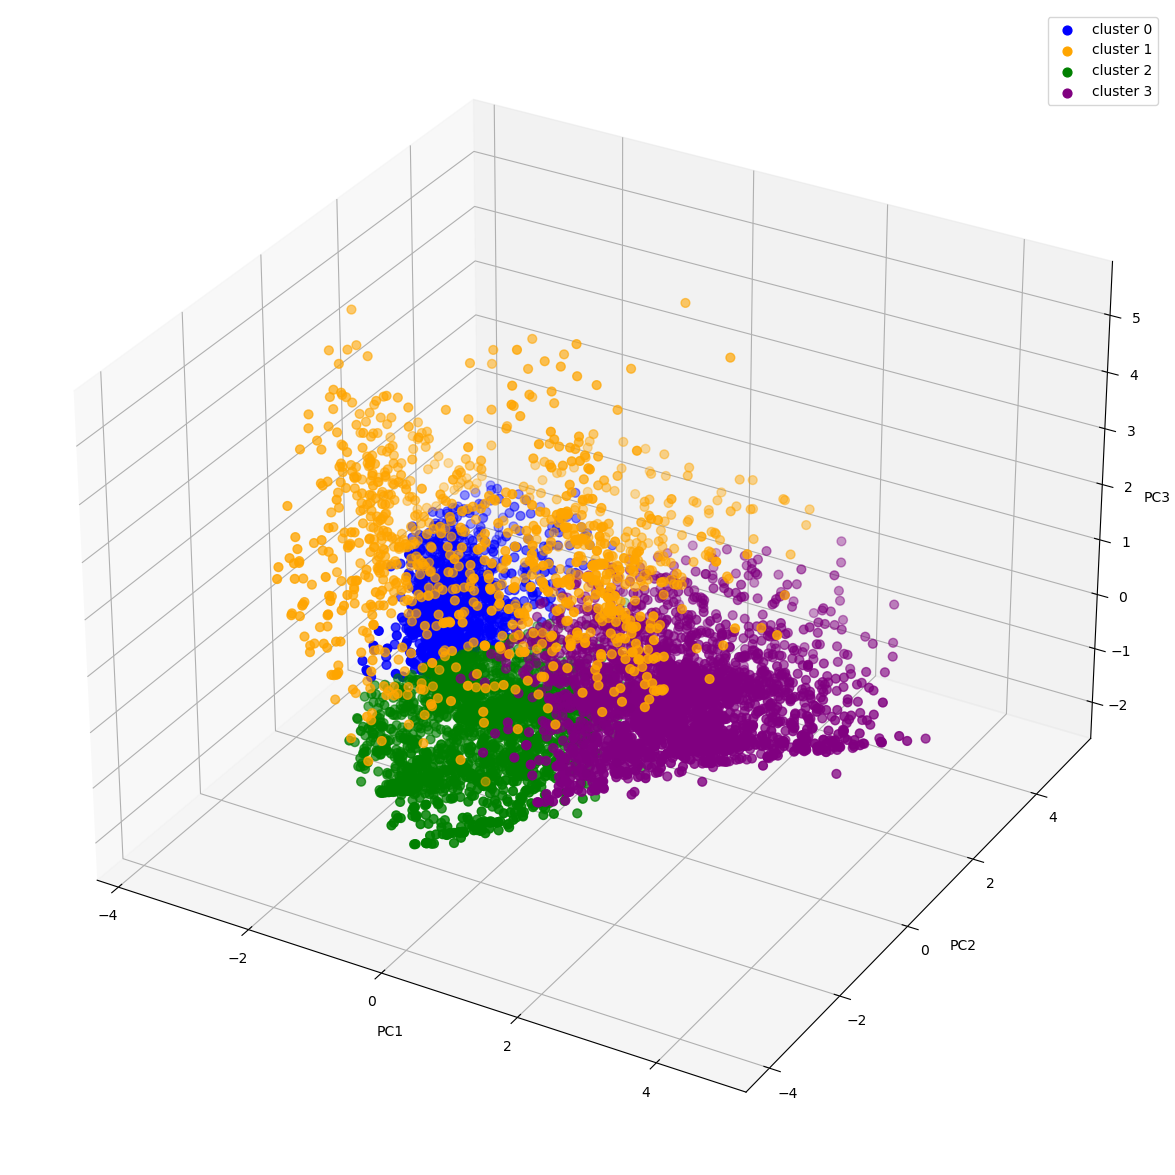

In [ ]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_pca1[cluster_8 == 0,0],train_pca1[cluster_8 == 0,1],train_pca1[cluster_8 == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(train_pca1[cluster_8 == 1,0],train_pca1[cluster_8 == 1,1],train_pca1[cluster_8 == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(train_pca1[cluster_8 == 2,0],train_pca1[cluster_8 == 2,1],train_pca1[cluster_8 == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(train_pca1[cluster_8 == 3,0],train_pca1[cluster_8 == 3,1],train_pca1[cluster_8 == 3,2], s = 40 , color = 'purple', label = "cluster 3")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

Los cluster se traslapan en demasiados puntos. Finalmente el mejor modelo de mezclas gaussianas es con la matriz de covarianza tipo tied

# Resultados de modelos

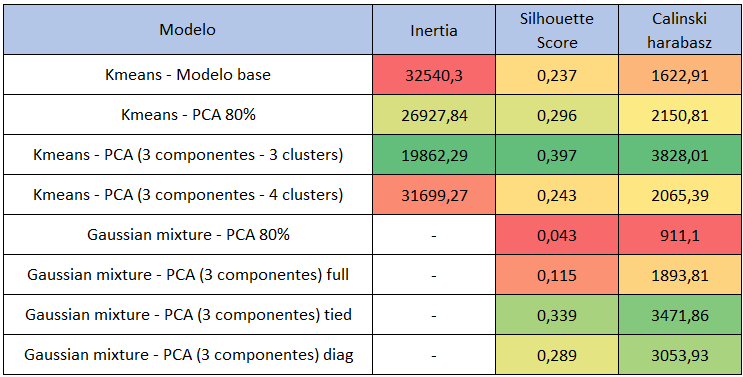

Resumiendo los resultados de todos los modelos se concluye que el mejor modelo es el de k-means con 3 componentes principales generadas a partir del metodo de PCA, el segundo mejor modelo es el de mezclas gaussianas con 3 componentes y con la matriz de covarianza tipo tied. Finalmente es importante decir que se pueden mejorar los modelos mejorando algunos hiperparametros.

# Tabla final

In [ ]:
# Nueva tabla
#tabla.to_csv("tablacompleta.csv",index=False)